In [1]:
import numpy as np
import pandas as pd
import re
import pickle

import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import TruncatedSVD # LSA
from sklearn.preprocessing import StandardScaler, Normalizer
from imblearn.over_sampling import SMOTE

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.metrics import precision_score, recall_score, f1_score, r2_score

import numpy as np
import tensorflow as tf
from keras import backend as K
from tensorflow import keras
import tensorflow_hub as hub
import os
from tensorflow.keras import layers, Sequential, Model
from tensorflow.keras.layers import Embedding
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.regularizers import l2
from keras.layers import LSTM, Embedding,BatchNormalization, Dense, TimeDistributed
from keras.layers import Input, Dropout, Bidirectional, Flatten, GlobalMaxPool1D, Conv1D, MaxPooling1D, GRU, SpatialDropout1D, Layer
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, Callback
from tensorflow.keras.optimizers import SGD, Adam
#import tokenization

import torch
import torch.nn as nn
import torch.utils.data

# Multi-CPU
from joblib import parallel_backend
from collections import defaultdict

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
FOLDER_DATA  = '/content/drive/My Drive/datasets/nlp-getting-started'
folder_test  = "/content/drive/My Drive/datasets/nlp-getting-started/test.csv"
folder_train = "/content/drive/My Drive/datasets/nlp-getting-started/train.csv"

In [4]:
df_train = pd.read_csv(folder_train, index_col=False)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          7613 non-null   int64 
 1   keyword     7552 non-null   object
 2   location    5080 non-null   object
 3   text        7613 non-null   object
 4   target      7613 non-null   int64 
 5   text_clean  7613 non-null   object
dtypes: int64(2), object(4)
memory usage: 357.0+ KB


In [ ]:
df_train.head()

,id,keyword,location,text,target,text_clean
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deed are the reason of this # earthquak ma...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la rong sask . canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all resid ask to ' shelter in place ' are be n...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"13,000 peopl receiv # wildfir evacu order in c..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from rubi # alaska as...


## Data preprocesing

In [ ]:
def clean_tweet(tweet: str) -> str:

  # Special characters
  tweet = re.sub(r"\x89Û_", "", tweet)
  tweet = re.sub(r"\x89ÛÒ", "", tweet)
  tweet = re.sub(r"\x89ÛÓ", "", tweet)
  tweet = re.sub(r"\x89ÛÏWhen", "When", tweet)
  tweet = re.sub(r"\x89ÛÏ", "", tweet)
  tweet = re.sub(r"China\x89Ûªs", "China's", tweet)
  tweet = re.sub(r"let\x89Ûªs", "let's", tweet)
  tweet = re.sub(r"\x89Û÷", "", tweet)
  tweet = re.sub(r"\x89Ûª", "", tweet)
  tweet = re.sub(r"\x89Û\x9d", "", tweet)
  tweet = re.sub(r"å_", "", tweet)
  tweet = re.sub(r"\x89Û¢", "", tweet)
  tweet = re.sub(r"\x89Û¢åÊ", "", tweet)
  tweet = re.sub(r"fromåÊwounds", "from wounds", tweet)
  tweet = re.sub(r"åÊ", "", tweet)
  tweet = re.sub(r"åÈ", "", tweet)
  tweet = re.sub(r"JapÌ_n", "Japan", tweet)    
  tweet = re.sub(r"Ì©", "e", tweet)
  tweet = re.sub(r"å¨", "", tweet)
  tweet = re.sub(r"SuruÌ¤", "Suruc", tweet)
  tweet = re.sub(r"åÇ", "", tweet)
  tweet = re.sub(r"å£3million", "3 million", tweet)
  tweet = re.sub(r"åÀ", "", tweet)
  
  # Contractions
  tweet = re.sub(r"he's", "he is", tweet)
  tweet = re.sub(r"there's", "there is", tweet)
  tweet = re.sub(r"We're", "We are", tweet)
  tweet = re.sub(r"That's", "That is", tweet)
  tweet = re.sub(r"won't", "will not", tweet)
  tweet = re.sub(r"they're", "they are", tweet)
  tweet = re.sub(r"Can't", "Cannot", tweet)
  tweet = re.sub(r"wasn't", "was not", tweet)
  tweet = re.sub(r"don\x89Ûªt", "do not", tweet)
  tweet = re.sub(r"aren't", "are not", tweet)
  tweet = re.sub(r"isn't", "is not", tweet)
  tweet = re.sub(r"What's", "What is", tweet)
  tweet = re.sub(r"haven't", "have not", tweet)
  tweet = re.sub(r"hasn't", "has not", tweet)
  tweet = re.sub(r"There's", "There is", tweet)
  tweet = re.sub(r"He's", "He is", tweet)
  tweet = re.sub(r"It's", "It is", tweet)
  tweet = re.sub(r"You're", "You are", tweet)
  tweet = re.sub(r"I'M", "I am", tweet)
  tweet = re.sub(r"shouldn't", "should not", tweet)
  tweet = re.sub(r"wouldn't", "would not", tweet)
  tweet = re.sub(r"i'm", "I am", tweet)
  tweet = re.sub(r"I\x89Ûªm", "I am", tweet)
  tweet = re.sub(r"I'm", "I am", tweet)
  tweet = re.sub(r"Isn't", "is not", tweet)
  tweet = re.sub(r"Here's", "Here is", tweet)
  tweet = re.sub(r"you've", "you have", tweet)
  tweet = re.sub(r"you\x89Ûªve", "you have", tweet)
  tweet = re.sub(r"we're", "we are", tweet)
  tweet = re.sub(r"what's", "what is", tweet)
  tweet = re.sub(r"couldn't", "could not", tweet)
  tweet = re.sub(r"we've", "we have", tweet)
  tweet = re.sub(r"it\x89Ûªs", "it is", tweet)
  tweet = re.sub(r"doesn\x89Ûªt", "does not", tweet)
  tweet = re.sub(r"It\x89Ûªs", "It is", tweet)
  tweet = re.sub(r"Here\x89Ûªs", "Here is", tweet)
  tweet = re.sub(r"who's", "who is", tweet)
  tweet = re.sub(r"I\x89Ûªve", "I have", tweet)
  tweet = re.sub(r"y'all", "you all", tweet)
  tweet = re.sub(r"can\x89Ûªt", "cannot", tweet)
  tweet = re.sub(r"would've", "would have", tweet)
  tweet = re.sub(r"it'll", "it will", tweet)
  tweet = re.sub(r"we'll", "we will", tweet)
  tweet = re.sub(r"wouldn\x89Ûªt", "would not", tweet)
  tweet = re.sub(r"We've", "We have", tweet)
  tweet = re.sub(r"he'll", "he will", tweet)
  tweet = re.sub(r"Y'all", "You all", tweet)
  tweet = re.sub(r"Weren't", "Were not", tweet)
  tweet = re.sub(r"Didn't", "Did not", tweet)
  tweet = re.sub(r"they'll", "they will", tweet)
  tweet = re.sub(r"they'd", "they would", tweet)
  tweet = re.sub(r"DON'T", "DO NOT", tweet)
  tweet = re.sub(r"That\x89Ûªs", "That is", tweet)
  tweet = re.sub(r"they've", "they have", tweet)
  tweet = re.sub(r"i'd", "I would", tweet)
  tweet = re.sub(r"should've", "should have", tweet)
  tweet = re.sub(r"You\x89Ûªre", "You are", tweet)
  tweet = re.sub(r"where's", "where is", tweet)
  tweet = re.sub(r"Don\x89Ûªt", "Do not", tweet)
  tweet = re.sub(r"we'd", "we would", tweet)
  tweet = re.sub(r"i'll", "I will", tweet)
  tweet = re.sub(r"weren't", "were not", tweet)
  tweet = re.sub(r"They're", "They are", tweet)
  tweet = re.sub(r"Can\x89Ûªt", "Cannot", tweet)
  tweet = re.sub(r"you\x89Ûªll", "you will", tweet)
  tweet = re.sub(r"I\x89Ûªd", "I would", tweet)
  tweet = re.sub(r"let's", "let us", tweet)
  tweet = re.sub(r"it's", "it is", tweet)
  tweet = re.sub(r"can't", "cannot", tweet)
  tweet = re.sub(r"don't", "do not", tweet)
  tweet = re.sub(r"you're", "you are", tweet)
  tweet = re.sub(r"i've", "I have", tweet)
  tweet = re.sub(r"that's", "that is", tweet)
  tweet = re.sub(r"i'll", "I will", tweet)
  tweet = re.sub(r"doesn't", "does not", tweet)
  tweet = re.sub(r"i'd", "I would", tweet)
  tweet = re.sub(r"didn't", "did not", tweet)
  tweet = re.sub(r"ain't", "am not", tweet)
  tweet = re.sub(r"you'll", "you will", tweet)
  tweet = re.sub(r"I've", "I have", tweet)
  tweet = re.sub(r"Don't", "do not", tweet)
  tweet = re.sub(r"I'll", "I will", tweet)
  tweet = re.sub(r"I'd", "I would", tweet)
  tweet = re.sub(r"Let's", "Let us", tweet)
  tweet = re.sub(r"you'd", "You would", tweet)
  tweet = re.sub(r"It's", "It is", tweet)
  tweet = re.sub(r"Ain't", "am not", tweet)
  tweet = re.sub(r"Haven't", "Have not", tweet)
  tweet = re.sub(r"Could've", "Could have", tweet)
  tweet = re.sub(r"youve", "you have", tweet)  
  tweet = re.sub(r"donå«t", "do not", tweet)   
          
  # Character entity references
  tweet = re.sub(r"&gt;", ">", tweet)
  tweet = re.sub(r"&lt;", "<", tweet)
  tweet = re.sub(r"&amp;", "&", tweet)
  
  # Typos, slang and informal abbreviations
  tweet = re.sub(r"w/e", "whatever", tweet)
  tweet = re.sub(r"w/", "with", tweet)
  tweet = re.sub(r"USAgov", "USA government", tweet)
  tweet = re.sub(r"recentlu", "recently", tweet)
  tweet = re.sub(r"Ph0tos", "Photos", tweet)
  tweet = re.sub(r"amirite", "am I right", tweet)
  tweet = re.sub(r"exp0sed", "exposed", tweet)
  tweet = re.sub(r"<3", "love", tweet)
  tweet = re.sub(r"amageddon", "armageddon", tweet)
  tweet = re.sub(r"Trfc", "Traffic", tweet)
  tweet = re.sub(r"8/5/2015", "2015-08-05", tweet)
  tweet = re.sub(r"WindStorm", "Wind Storm", tweet)
  tweet = re.sub(r"8/6/2015", "2015-08-06", tweet)
  tweet = re.sub(r"10:38PM", "10:38 PM", tweet)
  tweet = re.sub(r"10:30pm", "10:30 PM", tweet)
  tweet = re.sub(r"16yr", "16 year", tweet)
  tweet = re.sub(r"lmao", "laughing my ass off", tweet)   
  tweet = re.sub(r"TRAUMATISED", "traumatized", tweet)
  
  # Hashtags and usernames
  tweet = re.sub(r"IranDeal", "Iran Deal", tweet)
  tweet = re.sub(r"ArianaGrande", "Ariana Grande", tweet)
  tweet = re.sub(r"camilacabello97", "camila cabello", tweet) 
  tweet = re.sub(r"RondaRousey", "Ronda Rousey", tweet)     
  tweet = re.sub(r"MTVHottest", "MTV Hottest", tweet)
  tweet = re.sub(r"TrapMusic", "Trap Music", tweet)
  tweet = re.sub(r"ProphetMuhammad", "Prophet Muhammad", tweet)
  tweet = re.sub(r"PantherAttack", "Panther Attack", tweet)
  tweet = re.sub(r"StrategicPatience", "Strategic Patience", tweet)
  tweet = re.sub(r"socialnews", "social news", tweet)
  tweet = re.sub(r"NASAHurricane", "NASA Hurricane", tweet)
  tweet = re.sub(r"onlinecommunities", "online communities", tweet)
  tweet = re.sub(r"humanconsumption", "human consumption", tweet)
  tweet = re.sub(r"Typhoon-Devastated", "Typhoon Devastated", tweet)
  tweet = re.sub(r"Meat-Loving", "Meat Loving", tweet)
  tweet = re.sub(r"facialabuse", "facial abuse", tweet)
  tweet = re.sub(r"LakeCounty", "Lake County", tweet)
  tweet = re.sub(r"BeingAuthor", "Being Author", tweet)
  tweet = re.sub(r"withheavenly", "with heavenly", tweet)
  tweet = re.sub(r"thankU", "thank you", tweet)
  tweet = re.sub(r"iTunesMusic", "iTunes Music", tweet)
  tweet = re.sub(r"OffensiveContent", "Offensive Content", tweet)
  tweet = re.sub(r"WorstSummerJob", "Worst Summer Job", tweet)
  tweet = re.sub(r"HarryBeCareful", "Harry Be Careful", tweet)
  tweet = re.sub(r"NASASolarSystem", "NASA Solar System", tweet)
  tweet = re.sub(r"animalrescue", "animal rescue", tweet)
  tweet = re.sub(r"KurtSchlichter", "Kurt Schlichter", tweet)
  tweet = re.sub(r"aRmageddon", "armageddon", tweet)
  tweet = re.sub(r"Throwingknifes", "Throwing knives", tweet)
  tweet = re.sub(r"GodsLove", "God's Love", tweet)
  tweet = re.sub(r"bookboost", "book boost", tweet)
  tweet = re.sub(r"ibooklove", "I book love", tweet)
  tweet = re.sub(r"NestleIndia", "Nestle India", tweet)
  tweet = re.sub(r"realDonaldTrump", "Donald Trump", tweet)
  tweet = re.sub(r"DavidVonderhaar", "David Vonderhaar", tweet)
  tweet = re.sub(r"CecilTheLion", "Cecil The Lion", tweet)
  tweet = re.sub(r"weathernetwork", "weather network", tweet)
  tweet = re.sub(r"withBioterrorism&use", "with Bioterrorism & use", tweet)
  tweet = re.sub(r"Hostage&2", "Hostage & 2", tweet)
  tweet = re.sub(r"GOPDebate", "GOP Debate", tweet)
  tweet = re.sub(r"RickPerry", "Rick Perry", tweet)
  tweet = re.sub(r"frontpage", "front page", tweet)
  tweet = re.sub(r"NewsInTweets", "News In Tweets", tweet)
  tweet = re.sub(r"ViralSpell", "Viral Spell", tweet)
  tweet = re.sub(r"til_now", "until now", tweet)
  tweet = re.sub(r"volcanoinRussia", "volcano in Russia", tweet)
  tweet = re.sub(r"ZippedNews", "Zipped News", tweet)
  tweet = re.sub(r"MicheleBachman", "Michele Bachman", tweet)
  tweet = re.sub(r"53inch", "53 inch", tweet)
  tweet = re.sub(r"KerrickTrial", "Kerrick Trial", tweet)
  tweet = re.sub(r"abstorm", "Alberta Storm", tweet)
  tweet = re.sub(r"Beyhive", "Beyonce hive", tweet)
  tweet = re.sub(r"IDFire", "Idaho Fire", tweet)
  tweet = re.sub(r"DETECTADO", "Detected", tweet)
  tweet = re.sub(r"RockyFire", "Rocky Fire", tweet)
  tweet = re.sub(r"Listen/Buy", "Listen / Buy", tweet)
  tweet = re.sub(r"NickCannon", "Nick Cannon", tweet)
  tweet = re.sub(r"FaroeIslands", "Faroe Islands", tweet)
  tweet = re.sub(r"yycstorm", "Calgary Storm", tweet)
  tweet = re.sub(r"IDPs:", "Internally Displaced People :", tweet)
  tweet = re.sub(r"ArtistsUnited", "Artists United", tweet)
  tweet = re.sub(r"ClaytonBryant", "Clayton Bryant", tweet)
  tweet = re.sub(r"jimmyfallon", "jimmy fallon", tweet)
  tweet = re.sub(r"justinbieber", "justin bieber", tweet)  
  tweet = re.sub(r"UTC2015", "UTC 2015", tweet)
  tweet = re.sub(r"Time2015", "Time 2015", tweet)
  tweet = re.sub(r"djicemoon", "dj icemoon", tweet)
  tweet = re.sub(r"LivingSafely", "Living Safely", tweet)
  tweet = re.sub(r"FIFA16", "Fifa 2016", tweet)
  tweet = re.sub(r"thisiswhywecanthavenicethings", "this is why we cannot have nice things", tweet)
  tweet = re.sub(r"bbcnews", "bbc news", tweet)
  tweet = re.sub(r"UndergroundRailraod", "Underground Railraod", tweet)
  tweet = re.sub(r"c4news", "c4 news", tweet)
  tweet = re.sub(r"OBLITERATION", "obliteration", tweet)
  tweet = re.sub(r"MUDSLIDE", "mudslide", tweet)
  tweet = re.sub(r"NoSurrender", "No Surrender", tweet)
  tweet = re.sub(r"NotExplained", "Not Explained", tweet)
  tweet = re.sub(r"greatbritishbakeoff", "great british bake off", tweet)
  tweet = re.sub(r"LondonFire", "London Fire", tweet)
  tweet = re.sub(r"KOTAWeather", "KOTA Weather", tweet)
  tweet = re.sub(r"LuchaUnderground", "Lucha Underground", tweet)
  tweet = re.sub(r"KOIN6News", "KOIN 6 News", tweet)
  tweet = re.sub(r"LiveOnK2", "Live On K2", tweet)
  tweet = re.sub(r"9NewsGoldCoast", "9 News Gold Coast", tweet)
  tweet = re.sub(r"nikeplus", "nike plus", tweet)
  tweet = re.sub(r"david_cameron", "David Cameron", tweet)
  tweet = re.sub(r"peterjukes", "Peter Jukes", tweet)
  tweet = re.sub(r"JamesMelville", "James Melville", tweet)
  tweet = re.sub(r"megynkelly", "Megyn Kelly", tweet)
  tweet = re.sub(r"cnewslive", "C News Live", tweet)
  tweet = re.sub(r"JamaicaObserver", "Jamaica Observer", tweet)
  tweet = re.sub(r"TweetLikeItsSeptember11th2001", "Tweet like it is september 11th 2001", tweet)
  tweet = re.sub(r"cbplawyers", "cbp lawyers", tweet)
  tweet = re.sub(r"fewmoretweets", "few more tweets", tweet)
  tweet = re.sub(r"BlackLivesMatter", "Black Lives Matter", tweet)
  tweet = re.sub(r"cjoyner", "Chris Joyner", tweet)
  tweet = re.sub(r"ENGvAUS", "England vs Australia", tweet)
  tweet = re.sub(r"ScottWalker", "Scott Walker", tweet)
  tweet = re.sub(r"MikeParrActor", "Michael Parr", tweet)
  tweet = re.sub(r"4PlayThursdays", "Foreplay Thursdays", tweet)
  tweet = re.sub(r"TGF2015", "Tontitown Grape Festival", tweet)
  tweet = re.sub(r"realmandyrain", "Mandy Rain", tweet)
  tweet = re.sub(r"GraysonDolan", "Grayson Dolan", tweet)
  tweet = re.sub(r"ApolloBrown", "Apollo Brown", tweet)
  tweet = re.sub(r"saddlebrooke", "Saddlebrooke", tweet)
  tweet = re.sub(r"TontitownGrape", "Tontitown Grape", tweet)
  tweet = re.sub(r"AbbsWinston", "Abbs Winston", tweet)
  tweet = re.sub(r"ShaunKing", "Shaun King", tweet)
  tweet = re.sub(r"MeekMill", "Meek Mill", tweet)
  tweet = re.sub(r"TornadoGiveaway", "Tornado Giveaway", tweet)
  tweet = re.sub(r"GRupdates", "GR updates", tweet)
  tweet = re.sub(r"SouthDowns", "South Downs", tweet)
  tweet = re.sub(r"braininjury", "brain injury", tweet)
  tweet = re.sub(r"auspol", "Australian politics", tweet)
  tweet = re.sub(r"PlannedParenthood", "Planned Parenthood", tweet)
  tweet = re.sub(r"calgaryweather", "Calgary Weather", tweet)
  tweet = re.sub(r"weallheartonedirection", "we all heart one direction", tweet)
  tweet = re.sub(r"edsheeran", "Ed Sheeran", tweet)
  tweet = re.sub(r"TrueHeroes", "True Heroes", tweet)
  tweet = re.sub(r"S3XLEAK", "sex leak", tweet)
  tweet = re.sub(r"ComplexMag", "Complex Magazine", tweet)
  tweet = re.sub(r"TheAdvocateMag", "The Advocate Magazine", tweet)
  tweet = re.sub(r"CityofCalgary", "City of Calgary", tweet)
  tweet = re.sub(r"EbolaOutbreak", "Ebola Outbreak", tweet)
  tweet = re.sub(r"SummerFate", "Summer Fate", tweet)
  tweet = re.sub(r"RAmag", "Royal Academy Magazine", tweet)
  tweet = re.sub(r"offers2go", "offers to go", tweet)
  tweet = re.sub(r"foodscare", "food scare", tweet)
  tweet = re.sub(r"MNPDNashville", "Metropolitan Nashville Police Department", tweet)
  tweet = re.sub(r"TfLBusAlerts", "TfL Bus Alerts", tweet)
  tweet = re.sub(r"GamerGate", "Gamer Gate", tweet)
  tweet = re.sub(r"IHHen", "Humanitarian Relief", tweet)
  tweet = re.sub(r"spinningbot", "spinning bot", tweet)
  tweet = re.sub(r"ModiMinistry", "Modi Ministry", tweet)
  tweet = re.sub(r"TAXIWAYS", "taxi ways", tweet)
  tweet = re.sub(r"Calum5SOS", "Calum Hood", tweet)
  tweet = re.sub(r"po_st", "po.st", tweet)
  tweet = re.sub(r"scoopit", "scoop.it", tweet)
  tweet = re.sub(r"UltimaLucha", "Ultima Lucha", tweet)
  tweet = re.sub(r"JonathanFerrell", "Jonathan Ferrell", tweet)
  tweet = re.sub(r"aria_ahrary", "Aria Ahrary", tweet)
  tweet = re.sub(r"rapidcity", "Rapid City", tweet)
  tweet = re.sub(r"OutBid", "outbid", tweet)
  tweet = re.sub(r"lavenderpoetrycafe", "lavender poetry cafe", tweet)
  tweet = re.sub(r"EudryLantiqua", "Eudry Lantiqua", tweet)
  tweet = re.sub(r"15PM", "15 PM", tweet)
  tweet = re.sub(r"OriginalFunko", "Funko", tweet)
  tweet = re.sub(r"rightwaystan", "Richard Tan", tweet)
  tweet = re.sub(r"CindyNoonan", "Cindy Noonan", tweet)
  tweet = re.sub(r"RT_America", "RT America", tweet)
  tweet = re.sub(r"narendramodi", "Narendra Modi", tweet)
  tweet = re.sub(r"BakeOffFriends", "Bake Off Friends", tweet)
  tweet = re.sub(r"TeamHendrick", "Hendrick Motorsports", tweet)
  tweet = re.sub(r"alexbelloli", "Alex Belloli", tweet)
  tweet = re.sub(r"itsjustinstuart", "Justin Stuart", tweet)
  tweet = re.sub(r"gunsense", "gun sense", tweet)
  tweet = re.sub(r"DebateQuestionsWeWantToHear", "debate questions we want to hear", tweet)
  tweet = re.sub(r"RoyalCarribean", "Royal Carribean", tweet)
  tweet = re.sub(r"samanthaturne19", "Samantha Turner", tweet)
  tweet = re.sub(r"JonVoyage", "Jon Stewart", tweet)
  tweet = re.sub(r"renew911health", "renew 911 health", tweet)
  tweet = re.sub(r"SuryaRay", "Surya Ray", tweet)
  tweet = re.sub(r"pattonoswalt", "Patton Oswalt", tweet)
  tweet = re.sub(r"minhazmerchant", "Minhaz Merchant", tweet)
  tweet = re.sub(r"TLVFaces", "Israel Diaspora Coalition", tweet)
  tweet = re.sub(r"pmarca", "Marc Andreessen", tweet)
  tweet = re.sub(r"pdx911", "Portland Police", tweet)
  tweet = re.sub(r"jamaicaplain", "Jamaica Plain", tweet)
  tweet = re.sub(r"Japton", "Arkansas", tweet)
  tweet = re.sub(r"RouteComplex", "Route Complex", tweet)
  tweet = re.sub(r"INSubcontinent", "Indian Subcontinent", tweet)
  tweet = re.sub(r"NJTurnpike", "New Jersey Turnpike", tweet)
  tweet = re.sub(r"Politifiact", "PolitiFact", tweet)
  tweet = re.sub(r"Hiroshima70", "Hiroshima", tweet)
  tweet = re.sub(r"GMMBC", "Greater Mt Moriah Baptist Church", tweet)
  tweet = re.sub(r"versethe", "verse the", tweet)
  tweet = re.sub(r"TubeStrike", "Tube Strike", tweet)
  tweet = re.sub(r"MissionHills", "Mission Hills", tweet)
  tweet = re.sub(r"ProtectDenaliWolves", "Protect Denali Wolves", tweet)
  tweet = re.sub(r"NANKANA", "Nankana", tweet)
  tweet = re.sub(r"SAHIB", "Sahib", tweet)
  tweet = re.sub(r"PAKPATTAN", "Pakpattan", tweet)
  tweet = re.sub(r"Newz_Sacramento", "News Sacramento", tweet)
  tweet = re.sub(r"gofundme", "go fund me", tweet)
  tweet = re.sub(r"pmharper", "Stephen Harper", tweet)
  tweet = re.sub(r"IvanBerroa", "Ivan Berroa", tweet)
  tweet = re.sub(r"LosDelSonido", "Los Del Sonido", tweet)
  tweet = re.sub(r"bancodeseries", "banco de series", tweet)
  tweet = re.sub(r"timkaine", "Tim Kaine", tweet)
  tweet = re.sub(r"IdentityTheft", "Identity Theft", tweet)
  tweet = re.sub(r"AllLivesMatter", "All Lives Matter", tweet)
  tweet = re.sub(r"mishacollins", "Misha Collins", tweet)
  tweet = re.sub(r"BillNeelyNBC", "Bill Neely", tweet)
  tweet = re.sub(r"BeClearOnCancer", "be clear on cancer", tweet)
  tweet = re.sub(r"Kowing", "Knowing", tweet)
  tweet = re.sub(r"ScreamQueens", "Scream Queens", tweet)
  tweet = re.sub(r"AskCharley", "Ask Charley", tweet)
  tweet = re.sub(r"BlizzHeroes", "Heroes of the Storm", tweet)
  tweet = re.sub(r"BradleyBrad47", "Bradley Brad", tweet)
  tweet = re.sub(r"HannaPH", "Typhoon Hanna", tweet)
  tweet = re.sub(r"meinlcymbals", "MEINL Cymbals", tweet)
  tweet = re.sub(r"Ptbo", "Peterborough", tweet)
  tweet = re.sub(r"cnnbrk", "CNN Breaking News", tweet)
  tweet = re.sub(r"IndianNews", "Indian News", tweet)
  tweet = re.sub(r"savebees", "save bees", tweet)
  tweet = re.sub(r"GreenHarvard", "Green Harvard", tweet)
  tweet = re.sub(r"StandwithPP", "Stand with planned parenthood", tweet)
  tweet = re.sub(r"hermancranston", "Herman Cranston", tweet)
  tweet = re.sub(r"WMUR9", "WMUR-TV", tweet)
  tweet = re.sub(r"RockBottomRadFM", "Rock Bottom Radio", tweet)
  tweet = re.sub(r"ameenshaikh3", "Ameen Shaikh", tweet)
  tweet = re.sub(r"ProSyn", "Project Syndicate", tweet)
  tweet = re.sub(r"Daesh", "ISIS", tweet)
  tweet = re.sub(r"s2g", "swear to god", tweet)
  tweet = re.sub(r"listenlive", "listen live", tweet)
  tweet = re.sub(r"CDCgov", "Centers for Disease Control and Prevention", tweet)
  tweet = re.sub(r"FoxNew", "Fox News", tweet)
  tweet = re.sub(r"CBSBigBrother", "Big Brother", tweet)
  tweet = re.sub(r"JulieDiCaro", "Julie DiCaro", tweet)
  tweet = re.sub(r"theadvocatemag", "The Advocate Magazine", tweet)
  tweet = re.sub(r"RohnertParkDPS", "Rohnert Park Police Department", tweet)
  tweet = re.sub(r"THISIZBWRIGHT", "Bonnie Wright", tweet)
  tweet = re.sub(r"Popularmmos", "Popular MMOs", tweet)
  tweet = re.sub(r"WildHorses", "Wild Horses", tweet)
  tweet = re.sub(r"FantasticFour", "Fantastic Four", tweet)
  tweet = re.sub(r"HORNDALE", "Horndale", tweet)
  tweet = re.sub(r"PINER", "Piner", tweet)
  tweet = re.sub(r"BathAndNorthEastSomerset", "Bath and North East Somerset", tweet)
  tweet = re.sub(r"thatswhatfriendsarefor", "that is what friends are for", tweet)
  tweet = re.sub(r"residualincome", "residual income", tweet)
  tweet = re.sub(r"YahooNewsDigest", "Yahoo News Digest", tweet)
  tweet = re.sub(r"MalaysiaAirlines", "Malaysia Airlines", tweet)
  tweet = re.sub(r"AmazonDeals", "Amazon Deals", tweet)
  tweet = re.sub(r"MissCharleyWebb", "Charley Webb", tweet)
  tweet = re.sub(r"shoalstraffic", "shoals traffic", tweet)
  tweet = re.sub(r"GeorgeFoster72", "George Foster", tweet)
  tweet = re.sub(r"pop2015", "pop 2015", tweet)
  tweet = re.sub(r"_PokemonCards_", "Pokemon Cards", tweet)
  tweet = re.sub(r"DianneG", "Dianne Gallagher", tweet)
  tweet = re.sub(r"KashmirConflict", "Kashmir Conflict", tweet)
  tweet = re.sub(r"BritishBakeOff", "British Bake Off", tweet)
  tweet = re.sub(r"FreeKashmir", "Free Kashmir", tweet)
  tweet = re.sub(r"mattmosley", "Matt Mosley", tweet)
  tweet = re.sub(r"BishopFred", "Bishop Fred", tweet)
  tweet = re.sub(r"EndConflict", "End Conflict", tweet)
  tweet = re.sub(r"EndOccupation", "End Occupation", tweet)
  tweet = re.sub(r"UNHEALED", "unhealed", tweet)
  tweet = re.sub(r"CharlesDagnall", "Charles Dagnall", tweet)
  tweet = re.sub(r"Latestnews", "Latest news", tweet)
  tweet = re.sub(r"KindleCountdown", "Kindle Countdown", tweet)
  tweet = re.sub(r"NoMoreHandouts", "No More Handouts", tweet)
  tweet = re.sub(r"datingtips", "dating tips", tweet)
  tweet = re.sub(r"charlesadler", "Charles Adler", tweet)
  tweet = re.sub(r"twia", "Texas Windstorm Insurance Association", tweet)
  tweet = re.sub(r"txlege", "Texas Legislature", tweet)
  tweet = re.sub(r"WindstormInsurer", "Windstorm Insurer", tweet)
  tweet = re.sub(r"Newss", "News", tweet)
  tweet = re.sub(r"hempoil", "hemp oil", tweet)
  tweet = re.sub(r"CommoditiesAre", "Commodities are", tweet)
  tweet = re.sub(r"tubestrike", "tube strike", tweet)
  tweet = re.sub(r"JoeNBC", "Joe Scarborough", tweet)
  tweet = re.sub(r"LiteraryCakes", "Literary Cakes", tweet)
  tweet = re.sub(r"TI5", "The International 5", tweet)
  tweet = re.sub(r"thehill", "the hill", tweet)
  tweet = re.sub(r"3others", "3 others", tweet)
  tweet = re.sub(r"stighefootball", "Sam Tighe", tweet)
  tweet = re.sub(r"whatstheimportantvideo", "what is the important video", tweet)
  tweet = re.sub(r"ClaudioMeloni", "Claudio Meloni", tweet)
  tweet = re.sub(r"DukeSkywalker", "Duke Skywalker", tweet)
  tweet = re.sub(r"carsonmwr", "Fort Carson", tweet)
  tweet = re.sub(r"offdishduty", "off dish duty", tweet)
  tweet = re.sub(r"andword", "and word", tweet)
  tweet = re.sub(r"rhodeisland", "Rhode Island", tweet)
  tweet = re.sub(r"easternoregon", "Eastern Oregon", tweet)
  tweet = re.sub(r"WAwildfire", "Washington Wildfire", tweet)
  tweet = re.sub(r"fingerrockfire", "Finger Rock Fire", tweet)
  tweet = re.sub(r"57am", "57 am", tweet)
  tweet = re.sub(r"fingerrockfire", "Finger Rock Fire", tweet)
  tweet = re.sub(r"JacobHoggard", "Jacob Hoggard", tweet)
  tweet = re.sub(r"newnewnew", "new new new", tweet)
  tweet = re.sub(r"under50", "under 50", tweet)
  tweet = re.sub(r"getitbeforeitsgone", "get it before it is gone", tweet)
  tweet = re.sub(r"freshoutofthebox", "fresh out of the box", tweet)
  tweet = re.sub(r"amwriting", "am writing", tweet)
  tweet = re.sub(r"Bokoharm", "Boko Haram", tweet)
  tweet = re.sub(r"Nowlike", "Now like", tweet)
  tweet = re.sub(r"seasonfrom", "season from", tweet)
  tweet = re.sub(r"epicente", "epicenter", tweet)
  tweet = re.sub(r"epicenterr", "epicenter", tweet)
  tweet = re.sub(r"sicklife", "sick life", tweet)
  tweet = re.sub(r"yycweather", "Calgary Weather", tweet)
  tweet = re.sub(r"calgarysun", "Calgary Sun", tweet)
  tweet = re.sub(r"approachng", "approaching", tweet)
  tweet = re.sub(r"evng", "evening", tweet)
  tweet = re.sub(r"Sumthng", "something", tweet)
  tweet = re.sub(r"EllenPompeo", "Ellen Pompeo", tweet)
  tweet = re.sub(r"shondarhimes", "Shonda Rhimes", tweet)
  tweet = re.sub(r"ABCNetwork", "ABC Network", tweet)
  tweet = re.sub(r"SushmaSwaraj", "Sushma Swaraj", tweet)
  tweet = re.sub(r"pray4japan", "Pray for Japan", tweet)
  tweet = re.sub(r"hope4japan", "Hope for Japan", tweet)
  tweet = re.sub(r"Illusionimagess", "Illusion images", tweet)
  tweet = re.sub(r"SummerUnderTheStars", "Summer Under The Stars", tweet)
  tweet = re.sub(r"ShallWeDance", "Shall We Dance", tweet)
  tweet = re.sub(r"TCMParty", "TCM Party", tweet)
  tweet = re.sub(r"marijuananews", "marijuana news", tweet)
  tweet = re.sub(r"onbeingwithKristaTippett", "on being with Krista Tippett", tweet)
  tweet = re.sub(r"Beingtweets", "Being tweets", tweet)
  tweet = re.sub(r"newauthors", "new authors", tweet)
  tweet = re.sub(r"remedyyyy", "remedy", tweet)
  tweet = re.sub(r"44PM", "44 PM", tweet)
  tweet = re.sub(r"HeadlinesApp", "Headlines App", tweet)
  tweet = re.sub(r"40PM", "40 PM", tweet)
  tweet = re.sub(r"myswc", "Severe Weather Center", tweet)
  tweet = re.sub(r"ithats", "that is", tweet)
  tweet = re.sub(r"icouldsitinthismomentforever", "I could sit in this moment forever", tweet)
  tweet = re.sub(r"FatLoss", "Fat Loss", tweet)
  tweet = re.sub(r"02PM", "02 PM", tweet)
  tweet = re.sub(r"MetroFmTalk", "Metro Fm Talk", tweet)
  tweet = re.sub(r"Bstrd", "bastard", tweet)
  tweet = re.sub(r"bldy", "bloody", tweet)
  tweet = re.sub(r"MetrofmTalk", "Metro Fm Talk", tweet)
  tweet = re.sub(r"terrorismturn", "terrorism turn", tweet)
  tweet = re.sub(r"BBCNewsAsia", "BBC News Asia", tweet)
  tweet = re.sub(r"BehindTheScenes", "Behind The Scenes", tweet)
  tweet = re.sub(r"GeorgeTakei", "George Takei", tweet)
  tweet = re.sub(r"WomensWeeklyMag", "Womens Weekly Magazine", tweet)
  tweet = re.sub(r"SurvivorsGuidetoEarth", "Survivors Guide to Earth", tweet)
  tweet = re.sub(r"incubusband", "incubus band", tweet)
  tweet = re.sub(r"Babypicturethis", "Baby picture this", tweet)
  tweet = re.sub(r"BombEffects", "Bomb Effects", tweet)
  tweet = re.sub(r"win10", "Windows 10", tweet)
  tweet = re.sub(r"idkidk", "I do not know I do not know", tweet)
  tweet = re.sub(r"TheWalkingDead", "The Walking Dead", tweet)
  tweet = re.sub(r"amyschumer", "Amy Schumer", tweet)
  tweet = re.sub(r"crewlist", "crew list", tweet)
  tweet = re.sub(r"Erdogans", "Erdogan", tweet)
  tweet = re.sub(r"BBCLive", "BBC Live", tweet)
  tweet = re.sub(r"TonyAbbottMHR", "Tony Abbott", tweet)
  tweet = re.sub(r"paulmyerscough", "Paul Myerscough", tweet)
  tweet = re.sub(r"georgegallagher", "George Gallagher", tweet)
  tweet = re.sub(r"JimmieJohnson", "Jimmie Johnson", tweet)
  tweet = re.sub(r"pctool", "pc tool", tweet)
  tweet = re.sub(r"DoingHashtagsRight", "Doing Hashtags Right", tweet)
  tweet = re.sub(r"ThrowbackThursday", "Throwback Thursday", tweet)
  tweet = re.sub(r"SnowBackSunday", "Snowback Sunday", tweet)
  tweet = re.sub(r"LakeEffect", "Lake Effect", tweet)
  tweet = re.sub(r"RTphotographyUK", "Richard Thomas Photography UK", tweet)
  tweet = re.sub(r"BigBang_CBS", "Big Bang CBS", tweet)
  tweet = re.sub(r"writerslife", "writers life", tweet)
  tweet = re.sub(r"NaturalBirth", "Natural Birth", tweet)
  tweet = re.sub(r"UnusualWords", "Unusual Words", tweet)
  tweet = re.sub(r"wizkhalifa", "Wiz Khalifa", tweet)
  tweet = re.sub(r"acreativedc", "a creative DC", tweet)
  tweet = re.sub(r"vscodc", "vsco DC", tweet)
  tweet = re.sub(r"VSCOcam", "vsco camera", tweet)
  tweet = re.sub(r"TheBEACHDC", "The beach DC", tweet)
  tweet = re.sub(r"buildingmuseum", "building museum", tweet)
  tweet = re.sub(r"WorldOil", "World Oil", tweet)
  tweet = re.sub(r"redwedding", "red wedding", tweet)
  tweet = re.sub(r"AmazingRaceCanada", "Amazing Race Canada", tweet)
  tweet = re.sub(r"WakeUpAmerica", "Wake Up America", tweet)
  tweet = re.sub(r"\\Allahuakbar\\", "Allahu Akbar", tweet)
  tweet = re.sub(r"bleased", "blessed", tweet)
  tweet = re.sub(r"nigeriantribune", "Nigerian Tribune", tweet)
  tweet = re.sub(r"HIDEO_KOJIMA_EN", "Hideo Kojima", tweet)
  tweet = re.sub(r"FusionFestival", "Fusion Festival", tweet)
  tweet = re.sub(r"50Mixed", "50 Mixed", tweet)
  tweet = re.sub(r"NoAgenda", "No Agenda", tweet)
  tweet = re.sub(r"WhiteGenocide", "White Genocide", tweet)
  tweet = re.sub(r"dirtylying", "dirty lying", tweet)
  tweet = re.sub(r"SyrianRefugees", "Syrian Refugees", tweet)
  tweet = re.sub(r"changetheworld", "change the world", tweet)
  tweet = re.sub(r"Ebolacase", "Ebola case", tweet)
  tweet = re.sub(r"mcgtech", "mcg technologies", tweet)
  tweet = re.sub(r"withweapons", "with weapons", tweet)
  tweet = re.sub(r"advancedwarfare", "advanced warfare", tweet)
  tweet = re.sub(r"letsFootball", "let us Football", tweet)
  tweet = re.sub(r"LateNiteMix", "late night mix", tweet)
  tweet = re.sub(r"PhilCollinsFeed", "Phil Collins", tweet)
  tweet = re.sub(r"RudyHavenstein", "Rudy Havenstein", tweet)
  tweet = re.sub(r"22PM", "22 PM", tweet)
  tweet = re.sub(r"54am", "54 AM", tweet)
  tweet = re.sub(r"38am", "38 AM", tweet)
  tweet = re.sub(r"OldFolkExplainStuff", "Old Folk Explain Stuff", tweet)
  tweet = re.sub(r"BlacklivesMatter", "Black Lives Matter", tweet)
  tweet = re.sub(r"InsaneLimits", "Insane Limits", tweet)
  tweet = re.sub(r"youcantsitwithus", "you cannot sit with us", tweet)
  tweet = re.sub(r"2k15", "2015", tweet)
  tweet = re.sub(r"TheIran", "Iran", tweet)
  tweet = re.sub(r"JimmyFallon", "Jimmy Fallon", tweet)
  tweet = re.sub(r"AlbertBrooks", "Albert Brooks", tweet)
  tweet = re.sub(r"defense_news", "defense news", tweet)
  tweet = re.sub(r"nuclearrcSA", "Nuclear Risk Control Self Assessment", tweet)
  tweet = re.sub(r"Auspol", "Australia Politics", tweet)
  tweet = re.sub(r"NuclearPower", "Nuclear Power", tweet)
  tweet = re.sub(r"WhiteTerrorism", "White Terrorism", tweet)
  tweet = re.sub(r"truthfrequencyradio", "Truth Frequency Radio", tweet)
  tweet = re.sub(r"ErasureIsNotEquality", "Erasure is not equality", tweet)
  tweet = re.sub(r"ProBonoNews", "Pro Bono News", tweet)
  tweet = re.sub(r"JakartaPost", "Jakarta Post", tweet)
  tweet = re.sub(r"toopainful", "too painful", tweet)
  tweet = re.sub(r"melindahaunton", "Melinda Haunton", tweet)
  tweet = re.sub(r"NoNukes", "No Nukes", tweet)
  tweet = re.sub(r"curryspcworld", "Currys PC World", tweet)
  tweet = re.sub(r"ineedcake", "I need cake", tweet)
  tweet = re.sub(r"blackforestgateau", "black forest gateau", tweet)
  tweet = re.sub(r"BBCOne", "BBC One", tweet)
  tweet = re.sub(r"AlexxPage", "Alex Page", tweet)
  tweet = re.sub(r"jonathanserrie", "Jonathan Serrie", tweet)
  tweet = re.sub(r"SocialJerkBlog", "Social Jerk Blog", tweet)
  tweet = re.sub(r"ChelseaVPeretti", "Chelsea Peretti", tweet)
  tweet = re.sub(r"irongiant", "iron giant", tweet)
  tweet = re.sub(r"RonFunches", "Ron Funches", tweet)
  tweet = re.sub(r"TimCook", "Tim Cook", tweet)
  tweet = re.sub(r"sebastianstanisaliveandwell", "Sebastian Stan is alive and well", tweet)
  tweet = re.sub(r"Madsummer", "Mad summer", tweet)
  tweet = re.sub(r"NowYouKnow", "Now you know", tweet)
  tweet = re.sub(r"concertphotography", "concert photography", tweet)
  tweet = re.sub(r"TomLandry", "Tom Landry", tweet)
  tweet = re.sub(r"showgirldayoff", "show girl day off", tweet)
  tweet = re.sub(r"Yougslavia", "Yugoslavia", tweet)
  tweet = re.sub(r"QuantumDataInformatics", "Quantum Data Informatics", tweet)
  tweet = re.sub(r"FromTheDesk", "From The Desk", tweet)
  tweet = re.sub(r"TheaterTrial", "Theater Trial", tweet)
  tweet = re.sub(r"CatoInstitute", "Cato Institute", tweet)
  tweet = re.sub(r"EmekaGift", "Emeka Gift", tweet)
  tweet = re.sub(r"LetsBe_Rational", "Let us be rational", tweet)
  tweet = re.sub(r"Cynicalreality", "Cynical reality", tweet)
  tweet = re.sub(r"FredOlsenCruise", "Fred Olsen Cruise", tweet)
  tweet = re.sub(r"NotSorry", "not sorry", tweet)
  tweet = re.sub(r"UseYourWords", "use your words", tweet)
  tweet = re.sub(r"WordoftheDay", "word of the day", tweet)
  tweet = re.sub(r"Dictionarycom", "Dictionary.com", tweet)
  tweet = re.sub(r"TheBrooklynLife", "The Brooklyn Life", tweet)
  tweet = re.sub(r"jokethey", "joke they", tweet)
  tweet = re.sub(r"nflweek1picks", "NFL week 1 picks", tweet)
  tweet = re.sub(r"uiseful", "useful", tweet)
  tweet = re.sub(r"JusticeDotOrg", "The American Association for Justice", tweet)
  tweet = re.sub(r"autoaccidents", "auto accidents", tweet)
  tweet = re.sub(r"SteveGursten", "Steve Gursten", tweet)
  tweet = re.sub(r"MichiganAutoLaw", "Michigan Auto Law", tweet)
  tweet = re.sub(r"birdgang", "bird gang", tweet)
  tweet = re.sub(r"nflnetwork", "NFL Network", tweet)
  tweet = re.sub(r"NYDNSports", "NY Daily News Sports", tweet)
  tweet = re.sub(r"RVacchianoNYDN", "Ralph Vacchiano NY Daily News", tweet)
  tweet = re.sub(r"EdmontonEsks", "Edmonton Eskimos", tweet)
  tweet = re.sub(r"david_brelsford", "David Brelsford", tweet)
  tweet = re.sub(r"TOI_India", "The Times of India", tweet)
  tweet = re.sub(r"hegot", "he got", tweet)
  tweet = re.sub(r"SkinsOn9", "Skins on 9", tweet)
  tweet = re.sub(r"sothathappened", "so that happened", tweet)
  tweet = re.sub(r"LCOutOfDoors", "LC Out Of Doors", tweet)
  tweet = re.sub(r"NationFirst", "Nation First", tweet)
  tweet = re.sub(r"IndiaToday", "India Today", tweet)
  tweet = re.sub(r"HLPS", "helps", tweet)
  tweet = re.sub(r"HOSTAGESTHROSW", "hostages throw", tweet)
  tweet = re.sub(r"SNCTIONS", "sanctions", tweet)
  tweet = re.sub(r"BidTime", "Bid Time", tweet)
  tweet = re.sub(r"crunchysensible", "crunchy sensible", tweet)
  tweet = re.sub(r"RandomActsOfRomance", "Random acts of romance", tweet)
  tweet = re.sub(r"MomentsAtHill", "Moments at hill", tweet)
  tweet = re.sub(r"eatshit", "eat shit", tweet)
  tweet = re.sub(r"liveleakfun", "live leak fun", tweet)
  tweet = re.sub(r"SahelNews", "Sahel News", tweet)
  tweet = re.sub(r"abc7newsbayarea", "ABC 7 News Bay Area", tweet)
  tweet = re.sub(r"facilitiesmanagement", "facilities management", tweet)
  tweet = re.sub(r"facilitydude", "facility dude", tweet)
  tweet = re.sub(r"CampLogistics", "Camp logistics", tweet)
  tweet = re.sub(r"alaskapublic", "Alaska public", tweet)
  tweet = re.sub(r"MarketResearch", "Market Research", tweet)
  tweet = re.sub(r"AccuracyEsports", "Accuracy Esports", tweet)
  tweet = re.sub(r"TheBodyShopAust", "The Body Shop Australia", tweet)
  tweet = re.sub(r"yychail", "Calgary hail", tweet)
  tweet = re.sub(r"yyctraffic", "Calgary traffic", tweet)
  tweet = re.sub(r"eliotschool", "eliot school", tweet)
  tweet = re.sub(r"TheBrokenCity", "The Broken City", tweet)
  tweet = re.sub(r"OldsFireDept", "Olds Fire Department", tweet)
  tweet = re.sub(r"RiverComplex", "River Complex", tweet)
  tweet = re.sub(r"fieldworksmells", "field work smells", tweet)
  tweet = re.sub(r"IranElection", "Iran Election", tweet)
  tweet = re.sub(r"glowng", "glowing", tweet)
  tweet = re.sub(r"kindlng", "kindling", tweet)
  tweet = re.sub(r"riggd", "rigged", tweet)
  tweet = re.sub(r"slownewsday", "slow news day", tweet)
  tweet = re.sub(r"MyanmarFlood", "Myanmar Flood", tweet)
  tweet = re.sub(r"abc7chicago", "ABC 7 Chicago", tweet)
  tweet = re.sub(r"copolitics", "Colorado Politics", tweet)
  tweet = re.sub(r"AdilGhumro", "Adil Ghumro", tweet)
  tweet = re.sub(r"netbots", "net bots", tweet)
  tweet = re.sub(r"byebyeroad", "bye bye road", tweet)
  tweet = re.sub(r"massiveflooding", "massive flooding", tweet)
  tweet = re.sub(r"EndofUS", "End of United States", tweet)
  tweet = re.sub(r"35PM", "35 PM", tweet)
  tweet = re.sub(r"greektheatrela", "Greek Theatre Los Angeles", tweet)
  tweet = re.sub(r"76mins", "76 minutes", tweet)
  tweet = re.sub(r"publicsafetyfirst", "public safety first", tweet)
  tweet = re.sub(r"livesmatter", "lives matter", tweet)
  tweet = re.sub(r"myhometown", "my hometown", tweet)
  tweet = re.sub(r"tankerfire", "tanker fire", tweet)
  tweet = re.sub(r"MEMORIALDAY", "memorial day", tweet)
  tweet = re.sub(r"MEMORIAL_DAY", "memorial day", tweet)
  tweet = re.sub(r"instaxbooty", "instagram booty", tweet)
  tweet = re.sub(r"Jerusalem_Post", "Jerusalem Post", tweet)
  tweet = re.sub(r"WayneRooney_INA", "Wayne Rooney", tweet)
  tweet = re.sub(r"VirtualReality", "Virtual Reality", tweet)
  tweet = re.sub(r"OculusRift", "Oculus Rift", tweet)
  tweet = re.sub(r"OwenJones84", "Owen Jones", tweet)
  tweet = re.sub(r"jeremycorbyn", "Jeremy Corbyn", tweet)
  tweet = re.sub(r"paulrogers002", "Paul Rogers", tweet)
  tweet = re.sub(r"mortalkombatx", "Mortal Kombat X", tweet)
  tweet = re.sub(r"mortalkombat", "Mortal Kombat", tweet)
  tweet = re.sub(r"FilipeCoelho92", "Filipe Coelho", tweet)
  tweet = re.sub(r"OnlyQuakeNews", "Only Quake News", tweet)
  tweet = re.sub(r"kostumes", "costumes", tweet)
  tweet = re.sub(r"YEEESSSS", "yes", tweet)
  tweet = re.sub(r"ToshikazuKatayama", "Toshikazu Katayama", tweet)
  tweet = re.sub(r"IntlDevelopment", "Intl Development", tweet)
  tweet = re.sub(r"ExtremeWeather", "Extreme Weather", tweet)
  tweet = re.sub(r"WereNotGruberVoters", "We are not gruber voters", tweet)
  tweet = re.sub(r"NewsThousands", "News Thousands", tweet)
  tweet = re.sub(r"EdmundAdamus", "Edmund Adamus", tweet)
  tweet = re.sub(r"EyewitnessWV", "Eye witness WV", tweet)
  tweet = re.sub(r"PhiladelphiaMuseu", "Philadelphia Museum", tweet)
  tweet = re.sub(r"DublinComicCon", "Dublin Comic Con", tweet)
  tweet = re.sub(r"NicholasBrendon", "Nicholas Brendon", tweet)
  tweet = re.sub(r"Alltheway80s", "All the way 80s", tweet)
  tweet = re.sub(r"FromTheField", "From the field", tweet)
  tweet = re.sub(r"NorthIowa", "North Iowa", tweet)
  tweet = re.sub(r"WillowFire", "Willow Fire", tweet)
  tweet = re.sub(r"MadRiverComplex", "Mad River Complex", tweet)
  tweet = re.sub(r"feelingmanly", "feeling manly", tweet)
  tweet = re.sub(r"stillnotoverit", "still not over it", tweet)
  tweet = re.sub(r"FortitudeValley", "Fortitude Valley", tweet)
  tweet = re.sub(r"CoastpowerlineTramTr", "Coast powerline", tweet)
  tweet = re.sub(r"ServicesGold", "Services Gold", tweet)
  tweet = re.sub(r"NewsbrokenEmergency", "News broken emergency", tweet)
  tweet = re.sub(r"Evaucation", "evacuation", tweet)
  tweet = re.sub(r"leaveevacuateexitbe", "leave evacuate exit be", tweet)
  tweet = re.sub(r"P_EOPLE", "PEOPLE", tweet)
  tweet = re.sub(r"Tubestrike", "tube strike", tweet)
  tweet = re.sub(r"CLASS_SICK", "CLASS SICK", tweet)
  tweet = re.sub(r"localplumber", "local plumber", tweet)
  tweet = re.sub(r"awesomejobsiri", "awesome job siri", tweet)
  tweet = re.sub(r"PayForItHow", "Pay for it how", tweet)
  tweet = re.sub(r"ThisIsAfrica", "This is Africa", tweet)
  tweet = re.sub(r"crimeairnetwork", "crime air network", tweet)
  tweet = re.sub(r"KimAcheson", "Kim Acheson", tweet)
  tweet = re.sub(r"cityofcalgary", "City of Calgary", tweet)
  tweet = re.sub(r"prosyndicate", "pro syndicate", tweet)
  tweet = re.sub(r"660NEWS", "660 NEWS", tweet)
  tweet = re.sub(r"BusInsMagazine", "Business Insurance Magazine", tweet)
  tweet = re.sub(r"wfocus", "focus", tweet)
  tweet = re.sub(r"ShastaDam", "Shasta Dam", tweet)
  tweet = re.sub(r"go2MarkFranco", "Mark Franco", tweet)
  tweet = re.sub(r"StephGHinojosa", "Steph Hinojosa", tweet)
  tweet = re.sub(r"Nashgrier", "Nash Grier", tweet)
  tweet = re.sub(r"NashNewVideo", "Nash new video", tweet)
  tweet = re.sub(r"IWouldntGetElectedBecause", "I would not get elected because", tweet)
  tweet = re.sub(r"SHGames", "Sledgehammer Games", tweet)
  tweet = re.sub(r"bedhair", "bed hair", tweet)
  tweet = re.sub(r"JoelHeyman", "Joel Heyman", tweet)
  tweet = re.sub(r"viaYouTube", "via YouTube", tweet)
          
  # Urls
  tweet = re.sub(r"https?:\/\/t.co\/[A-Za-z0-9]+", "", tweet)
      
  # Words with punctuations and special characters
  punctuations = '@#!?+&*[]-%.:/();$=><|{}^' + "'`"
  for p in punctuations:
      tweet = tweet.replace(p, f' {p} ')
      
  # ... and ..
  tweet = tweet.replace('...', ' ... ')
  if '...' not in tweet:
      tweet = tweet.replace('..', ' ... ')      
      
  # Acronyms
  tweet = re.sub(r"MH370", "Malaysia Airlines Flight 370", tweet)
  tweet = re.sub(r"mÌ¼sica", "music", tweet)
  tweet = re.sub(r"okwx", "Oklahoma City Weather", tweet)
  tweet = re.sub(r"arwx", "Arkansas Weather", tweet)    
  tweet = re.sub(r"gawx", "Georgia Weather", tweet)  
  tweet = re.sub(r"scwx", "South Carolina Weather", tweet)  
  tweet = re.sub(r"cawx", "California Weather", tweet)
  tweet = re.sub(r"tnwx", "Tennessee Weather", tweet)
  tweet = re.sub(r"azwx", "Arizona Weather", tweet)  
  tweet = re.sub(r"alwx", "Alabama Weather", tweet)
  tweet = re.sub(r"wordpressdotcom", "wordpress", tweet)    
  tweet = re.sub(r"usNWSgov", "United States National Weather Service", tweet)
  tweet = re.sub(r"Suruc", "Sanliurfa", tweet)   
  
  # Grouping same words without embeddings
  tweet = re.sub(r"Bestnaijamade", "bestnaijamade", tweet)
  tweet = re.sub(r"SOUDELOR", "Soudelor", tweet)

  #tweet = re.sub(r'https?://\S+|www\.\S+', r'', tweet) # remove URLS
  #tweet = re.sub(r"[^\w\s\d]","", tweet) # remove pnctuations
  #tweet = re.sub(r'@\w+','', tweet) # remove mentions
  #tweet = re.sub(r'#\w+','', tweet) # remove hash
  #tweet = re.sub(r"\s+"," ", tweet).strip() # remove space
  #tweet = re.sub("\S*\d\S*", "", tweet).strip()
  #tweet = ' '.join([letter for letter in nltk.word_tokenize(tweet) 
  #                 if letter not in stopwords.words('english')])
  
  return tweet

stems = nltk.SnowballStemmer('english')
def stemming(tweet: str) -> str:
  return ' '.join(stems.stem(word) for word in tweet.split())

def tweet_processing_pipeline(tweet: str) -> str:
  tweet = clean_tweet(tweet)
  tweet = stemming(tweet)
  return tweet

In [ ]:
df_train['text_clean'] = df_train['text'].apply(tweet_processing_pipeline)
df_train['text_clean'].head()

KeyboardInterrupt: ignored

In [ ]:
df_train.to_csv(folder_train, index=None)

## Visualization

In [5]:
def TSNE_plot(x_data, y_data):
  X_embedded = TSNE(n_components=2).fit_transform(x_data)
  plt.scatter(X_embedded[:,0], X_embedded[:,1], c=y_data)
  plt.show()

def data_balance_plot(data: pd.DataFrame):
  sns.countplot(x='target', data=data)
  plt.show()

def word_cloud(data: pd.DataFrame, target: int):
  wc = WordCloud(background_color='white', max_words=200)

  wc = wc.generate(' '.join(text for text in df_train[df_train['target']==target].text))

  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.show()

In [ ]:
def progress_bar(msg, verbose=True):
    """
    Simple over-writing progress bar.
    """
    import sys
    
    if verbose:
        sys.stderr.write('\r')
        sys.stderr.write(msg)
        sys.stderr.flush()

class TorchModelBase:
    def __init__(self,
            batch_size=1028,
            max_iter=1000,
            eta=0.001,
            optimizer_class=torch.optim.Adam,
            l2_strength=0,
            gradient_accumulation_steps=1,
            max_grad_norm=None,
            warm_start=False,
            early_stopping=False,
            validation_fraction=0.1,
            n_iter_no_change=10,
            tol=1e-5,
            device=None,
            display_progress=True,
            **optimizer_kwargs):
      
        self.batch_size = batch_size
        self.max_iter = max_iter
        self.eta = eta
        self.optimizer_class = optimizer_class
        self.l2_strength = l2_strength
        self.gradient_accumulation_steps = max([gradient_accumulation_steps, 1])
        self.max_grad_norm = max_grad_norm
        self.warm_start = warm_start
        self.early_stopping = early_stopping
        self.validation_fraction = validation_fraction
        self.n_iter_no_change = n_iter_no_change
        self.tol = tol
        if device is None:
            device = "cuda" if torch.cuda.is_available() else "cpu"
        self.device = torch.device(device)
        self.display_progress = display_progress
        self.optimizer_kwargs = optimizer_kwargs
        for k, v in self.optimizer_kwargs.items():
            setattr(self, k, v)
        self.params = [
            'batch_size',
            'max_iter',
            'eta',
            'optimizer_class',
            'l2_strength',
            'gradient_accumulation_steps',
            'max_grad_norm',
            'validation_fraction',
            'early_stopping',
            'n_iter_no_change',
            'warm_start',
            'tol']
        self.params += list(optimizer_kwargs.keys())

    def build_dataset(self, *args, **kwargs):
        raise NotImplementedError

    def build_graph(self, *args, **kwargs):
        raise NotImplementedError

    def score(self, *args):
        raise NotImplementedError

    def build_optimizer(self):
        return self.optimizer_class(
            self.model.parameters(),
            lr=self.eta,
            weight_decay=self.l2_strength,
            **self.optimizer_kwargs)

    def fit(self, *args):
        if self.early_stopping:
            args, dev = self._build_validation_split(
                *args, validation_fraction=self.validation_fraction)

        # Dataset:
        dataset = self.build_dataset(*args)
        dataloader = self._build_dataloader(dataset, shuffle=True)

        # Graph:
        if not self.warm_start or not hasattr(self, "model"):
            self.model = self.build_graph()
            # This device move has to happen before the optimizer is built:
            # https://pytorch.org/docs/master/optim.html#constructing-it
            self.model.to(self.device)
            self.optimizer = self.build_optimizer()
            self.errors = []
            self.validation_scores = []
            self.no_improvement_count = 0
            self.best_error = np.inf
            self.best_score = -np.inf
            self.best_parameters = None

        # Make sure the model is where we want it:
        self.model.to(self.device)

        self.model.train()
        self.optimizer.zero_grad()

        for iteration in range(1, self.max_iter+1):

            epoch_error = 0.0

            for batch_num, batch in enumerate(dataloader, start=1):

                batch = [x.to(self.device, non_blocking=True) for x in batch]

                X_batch = batch[: -1]
                y_batch = batch[-1]

                batch_preds = self.model(*X_batch)

                err = self.loss(batch_preds, y_batch)

                if self.gradient_accumulation_steps > 1 and \
                  self.loss.reduction == "mean":
                    err /= self.gradient_accumulation_steps

                err.backward()

                epoch_error += err.item()

                if batch_num % self.gradient_accumulation_steps == 0 or \
                  batch_num == len(dataloader):
                    if self.max_grad_norm is not None:
                        torch.nn.utils.clip_grad_norm_(
                            self.model.parameters(), self.max_grad_norm)
                    self.optimizer.step()
                    self.optimizer.zero_grad()

            # Stopping criteria:

            if self.early_stopping:
                self._update_no_improvement_count_early_stopping(*dev)
                if self.no_improvement_count > self.n_iter_no_change:
                    progress_bar(
                        "Stopping after epoch {}. Validation score did "
                        "not improve by tol={} for more than {} epochs. "
                        "Final error is {}".format(iteration, self.tol,
                            self.n_iter_no_change, epoch_error),
                        verbose=self.display_progress)
                    break

            else:
                self._update_no_improvement_count_errors(epoch_error)
                if self.no_improvement_count > self.n_iter_no_change:
                    progress_bar(
                        "Stopping after epoch {}. Training loss did "
                        "not improve more than tol={}. Final error "
                        "is {}.".format(iteration, self.tol, epoch_error),
                        verbose=self.display_progress)
                    break

            progress_bar(
                "Finished epoch {} of {}; error is {}".format(
                    iteration, self.max_iter, epoch_error),
                verbose=self.display_progress)

        if self.early_stopping:
            self.model.load_state_dict(self.best_parameters)

        return self

    @staticmethod
    def _build_validation_split(*args, validation_fraction=0.2):
        if validation_fraction == 1.0:
            return args, args
        results = train_test_split(*args, test_size=validation_fraction)
        train = results[::2]
        dev = results[1::2]
        return train, dev

    def _build_dataloader(self, dataset, shuffle=True):
        if hasattr(dataset, "collate_fn"):
            collate_fn = dataset.collate_fn
        else:
            collate_fn = None
        dataloader = torch.utils.data.DataLoader(
            dataset,
            batch_size=self.batch_size,
            shuffle=shuffle,
            pin_memory=True,
            collate_fn=collate_fn)
        return dataloader

    def _update_no_improvement_count_early_stopping(self, *dev):
        score = self.score(*dev)
        self.validation_scores.append(score)
        if score < (self.best_score + self.tol):
            self.no_improvement_count += 1
        else:
            self.no_improvement_count = 0
        if score > self.best_score:
            self.best_parameters = copy.deepcopy(self.model.state_dict())
            self.best_score = score
        self.model.train()

    def _update_no_improvement_count_errors(self, epoch_error):
        if epoch_error > (self.best_error - self.tol):
            self.no_improvement_count += 1
        else:
            self.no_improvement_count = 0
        if epoch_error < self.best_error:
            self.best_error = epoch_error
        self.errors.append(epoch_error)

    def _predict(self, *args, device=None):
        device = self.device if device is None else torch.device(device)

        # Dataset:
        dataset = self.build_dataset(*args)
        dataloader = self._build_dataloader(dataset, shuffle=False)

        # Model:
        self.model.to(device)
        self.model.eval()

        preds = []
        with torch.no_grad():
            for batch in dataloader:
                X = [x.to(device, non_blocking=True) for x in batch]
                preds.append(self.model(*X))

        self.model.to(self.device)
        if all(x.shape[1: ] == preds[0].shape[1: ] for x in preds[1: ]):
            return torch.cat(preds, axis=0)
        else:
            return [p for batch in preds for p in batch]

    def get_params(self, deep=True):
        params = self.params.copy()
        if hasattr(self, 'vocab'):
            params += ['vocab']
        return {p: getattr(self, p) for p in params}

    def set_params(self, **params):
        for key, val in params.items():
            if key not in self.params:
                raise ValueError(
                    "{} is not a parameter for {}. For the list of "
                    "available parameters, use `self.params`.".format(
                        key, self.__class__.__name__))
            else:
                setattr(self, key, val)
        return self

    def to_pickle(self, output_filename):
        self.model = self.model.cpu()
        with open(output_filename, 'wb') as f:
            pickle.dump(self, f)

    @staticmethod
    def from_pickle(src_filename):
        with open(src_filename, 'rb') as f:
            return pickle.load(f)

    def __repr__(self):
        param_str = ["{}={}".format(a, getattr(self, a)) for a in self.params]
        param_str = ",\n\t".join(param_str)
        return "{}(\n\t{})".format(self.__class__.__name__, param_str)

In [ ]:
class TorchAutoencoder(TorchModelBase):
    def __init__(self,
            hidden_dim=50,
            hidden_activation=nn.Tanh(),
            **base_kwargs):
        self.hidden_dim = hidden_dim
        self.hidden_activation = hidden_activation
        super().__init__(**base_kwargs)
        self.loss = nn.MSELoss(reduction="mean")
        self.params += ['hidden_dim', 'hidden_activation']

    def build_dataset(self, X, y=None):
        # Data prep:
        X = np.array(X)
        self.input_dim = X.shape[1]
        self.output_dim = X.shape[1]
        # Dataset:
        X = self.convert_input_to_tensor(X)
        if y is None:
            dataset = torch.utils.data.TensorDataset(X)
        else:
            y = self.convert_input_to_tensor(y)
            dataset = torch.utils.data.TensorDataset(X, y)
        return dataset

    def build_graph(self):
        return nn.Sequential(
            nn.Linear(self.input_dim, self.hidden_dim),
            self.hidden_activation,
            nn.Linear(self.hidden_dim, self.output_dim))

    def fit(self, X):
        super().fit(X, X)
        # Hidden representations:
        with torch.no_grad():
            dataset = self.build_dataset(X)
            hidden_dataloader = self._build_dataloader(dataset, shuffle=False)
            H = []
            for X_input in hidden_dataloader:
                X_input = [x.to(self.device) for x in X_input]
                batch = self.model[1](self.model[0](*X_input))
                batch = batch.to("cpu")
                H.append(batch)
            H = torch.cat(H)
            return self.convert_output(H, X)

    def score(self, X, y=None, device=None):
        y = X if y is None else y
        preds = self.predict(X, device=device)
        return r2_score(y, preds)

    def predict(self, X, device=None):
        X_pred = self._predict(X, device=device)
        return self.convert_output(X_pred, X)

    def convert_input_to_tensor(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.values
        return torch.FloatTensor(X)

    @staticmethod
    def convert_output(X_pred, X):
        X_pred = X_pred.cpu().numpy()
        if isinstance(X, pd.DataFrame):
            X_pred = pd.DataFrame(X_pred, index=X.index)
        return X_pred

In [ ]:

def simple_example():
    import numpy as np

    def randmatrix(m, n, sigma=0.1, mu=0):
        return sigma * np.random.randn(m, n) + mu

    rank = 20
    nrow = 2000
    ncol = 100

    X = randmatrix(nrow, rank).dot(randmatrix(rank, ncol))

    mod = TorchAutoencoder()

    print(mod)

    H = mod.fit(X)

    X_pred = mod.predict(X)

    mse = ((X_pred - X)**2).mean()

    print("\nMSE between actual and reconstructed: {}".format(mse))

    r2 = mod.score(X)

    print("R^2 score: {}".format(r2))

    print("Hidden representations")
    print(H)

    return r2


simple_example()

Finished epoch 8 of 1000; error is 0.008346114307641983

TorchAutoencoder(
	batch_size=1028,
	max_iter=1000,
	eta=0.001,
	optimizer_class=<class 'torch.optim.adam.Adam'>,
	l2_strength=0,
	gradient_accumulation_steps=1,
	max_grad_norm=None,
	validation_fraction=0.1,
	early_stopping=False,
	n_iter_no_change=10,
	warm_start=False,
	tol=1e-05,
	hidden_dim=50,
	hidden_activation=Tanh())


Stopping after epoch 95. Training loss did not improve more than tol=1e-05. Final error is 0.00018556767463451251.


MSE between actual and reconstructed: 9.033134226119282e-05
R^2 score: 0.9520530688914619
Hidden representations
[[ 0.17465991 -0.08419085 -0.02872517 ... -0.02045734  0.20012192
   0.06253102]
 [-0.04615283 -0.064158   -0.04564092 ... -0.01917175  0.18215466
   0.08131397]
 [-0.05602094 -0.08278929  0.07898196 ... -0.02729976  0.0915973
  -0.06922766]
 ...
 [-0.12419539 -0.08627361 -0.04470974 ... -0.02279422  0.17724283
  -0.11320949]
 [-0.13648066 -0.15188648  0.03303637 ... -0.11811528 -0.02225079
   0.06151094]
 [ 0.13528888 -0.10880995  0.02817548 ... -0.03480174  0.1728763
  -0.07224032]]


0.9520530688914619

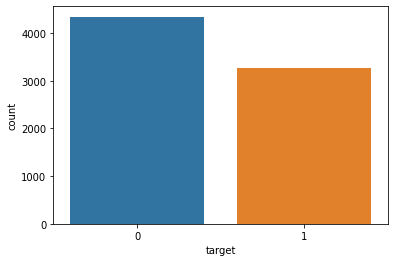

In [ ]:
data_balance_plot(df_train)

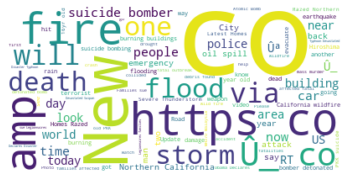

In [ ]:
word_cloud(df_train, 1) # Disaster

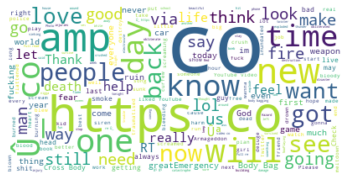

In [ ]:
word_cloud(df_train, 0) # Safe

In [ ]:
X = df_train['text_clean']
Y = df_train['target']
print(len(X), len(Y))

7613 7613


## Machine Learning (Bag of word)

In [49]:
def observed_over_expected(df):
    col_totals = df.sum(axis=0)
    total = col_totals.sum()
    row_totals = df.sum(axis=1)
    expected = np.outer(row_totals, col_totals) / total
    oe = df / expected
    return oe

def pmi(df, positive=True):
    df = observed_over_expected(df)
    # Silence distracting warnings about log(0):
    with np.errstate(divide='ignore'):
        df = np.log(df)
    df[np.isinf(df)] = 0.0  # log(0) = 0
    df[np.isnan(df)] = 0.0  # log(0) = 0
    if positive:
        df[df < 0] = 0.0
    return df

def create_embeddings(X, use_ppmi: bool = False, compression: int = None):
  
  count = CountVectorizer()
  x_num = count.fit_transform(X)
  
  if not use_ppmi:
    tfidf = TfidfTransformer()
    x_vec = tfidf.fit_transform(x_num)
  else:
    x_vec = pmi(x_num)
  
  return x_vec

def lsa(X, dimensions: int = 100):
    lsa = TruncatedSVD(n_components=dimensions)
    return lsa.fit_transform(X)

def auto_encoder(X):
  return TorchAutoencoder(
    max_iter=1000, 
    hidden_dim=50, 
    eta=0.01).fit(X)

def minMax_scaler(X):
    scaler = MinMaxScaler()
    return scaler.fit_transform(X)

def resampling(x, y):
  return SMOTE().fit_resample(x, y)

def fit_models(model, X, Y, kflod: bool = False, jobs: int = -1):

  x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30)

  if not kflod:
    with parallel_backend('threading', n_jobs = jobs):
      model.fit(x_train, y_train)

    model_report(model, x_test, y_test)
    
  else:
    scores = cross_validate(
        model, 
        x_train, 
        y_train, 
        scoring=['precision', 'recall', 'accuracy'], 
        cv=5, 
        return_train_score=False,
        return_estimator=True,
        n_jobs=-1
    )

    print("\n********K-FOLD SUMMARY*********")
    print(
        "Mean Precision:  %0.3f, Mean Recall:  %0.3f, Accuracy: %0.3f" 
        % (
            np.mean(scores['test_precision'])*100, 
            np.mean(scores['test_recall'])*100, 
            np.mean(scores['test_accuracy'])*100 
          )
    )
    model = scores['estimator']
    models_report(model, x_test, y_test)
  return model

def model_report(model, x_test, y_test):
  yp_class = model.predict(x_test)
  print(metrics.classification_report(y_test, yp_class))
  seaborn_conf(y_test, yp_class)
  ROC_curve(model, x_test, y_test)

def models_report(models, x_test, y_test):
  yp_class = np.zeros(y_test.shape[0])
  for model in models:
    yp_class += model.predict(x_test)
  yp_class /= len(models)
  yp_class = np.round(yp_class)
  print(metrics.classification_report(y_test, yp_class))
  seaborn_conf(y_test, yp_class)
  ROC_curve(model, x_test, y_test)

def seaborn_conf(y, ypred):
  y_true = ["Safe", "Disaster"]
  y_pred = ["Safe", "Disaster"]
  cf = confusion_matrix(y, ypred)
  df_cm = pd.DataFrame(cf, columns=np.unique(y_true), index = np.unique(y_true))
  plt.figure(figsize=(8,6))
  sns.heatmap(df_cm, annot=True, fmt='g')
  plt.title('Confusion matrix')
  plt.xlabel('Predicted value')
  plt.ylabel('Real value')
  plt.show()

def ROC_curve(model, y, ypred):
  metrics.plot_roc_curve(model, y, ypred)
  plt.title('Roc Curve')
  plt.show()

def save_pickle(model, filename):
  with open(os.path.join('/content/drive/My Drive/datasets/nlp-getting-started', filename), 'wb') as file:
    pickle.dump(model, file)
    

def load_pickle(filename):
  with open(os.path.join('/content/drive/My Drive/datasets/nlp-getting-started', filename), 'rb') as file:
    mod = pickle.load(file)
  
  return mod

In [ ]:
tfidf_emb = create_embeddings(X)

In [ ]:
print(tfidf_emb.shape)

(7613, 13844)


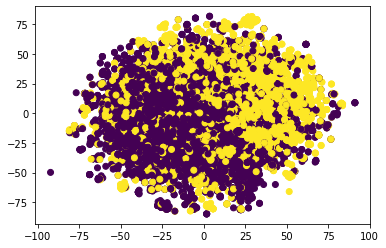

In [ ]:
TSNE_plot(tfidf_emb, Y)

In [ ]:
tfidf_emb_smote, Y_smote_tf = resampling(tfidf_emb, Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [ ]:
print(tfidf_emb_smote.shape)

(8684, 13844)


In [ ]:
tfidf_emb_autenc = auto_encoder(tfidf_emb.toarray())

Stopping after epoch 22. Training loss did not improve more than tol=1e-05. Final error is 0.0005701415648218244.

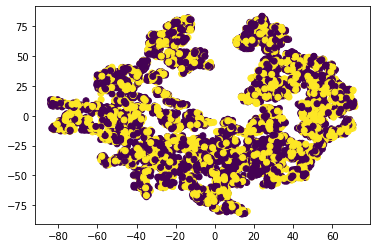

In [ ]:
TSNE_plot(tfidf_emb_autenc, Y)

In [ ]:
tfidf_emb_lsa_100 = lsa(tfidf_emb)

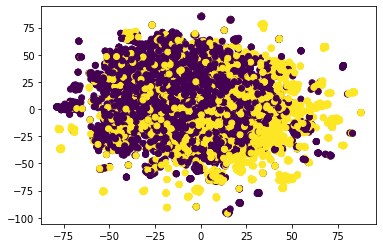

In [ ]:
TSNE_plot(tfidf_emb_lsa_100, Y)

In [ ]:
tfidf_emb_lsa_100_autenc = auto_encoder(tfidf_emb_lsa_100)

Stopping after epoch 57. Training loss did not improve more than tol=1e-05. Final error is 0.0057261125184595585.

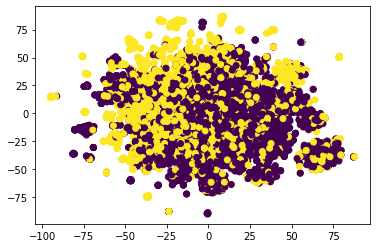

In [ ]:
TSNE_plot(tfidf_emb_lsa_100_autenc, Y)

In [ ]:
ppmi_emb = create_embeddings(X, use_ppmi=True)

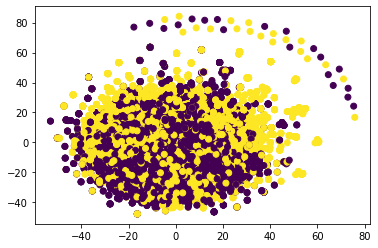

In [ ]:
TSNE_plot(ppmi_emb, Y)

In [ ]:
ppmi_emb_smote, Y_smote_ppmi = resampling(ppmi_emb, Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [ ]:
TSNE_plot(ppmi_emb_smote, Y)

KeyboardInterrupt: ignored

#### MultinomialNB

In [ ]:
def get_NB():
  parameters = {'alpha': np.arange(0, 1, 0.1)}
  return GridSearchCV(
    MultinomialNB(), parameters, cv = 5
  )

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10



              precision    recall  f1-score   support

           0       0.79      0.88      0.83      1302
           1       0.81      0.69      0.75       982

    accuracy                           0.80      2284
   macro avg       0.80      0.79      0.79      2284
weighted avg       0.80      0.80      0.80      2284



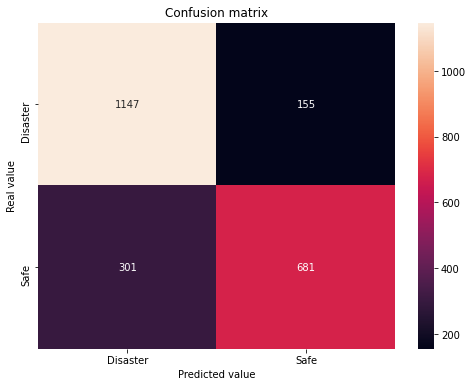

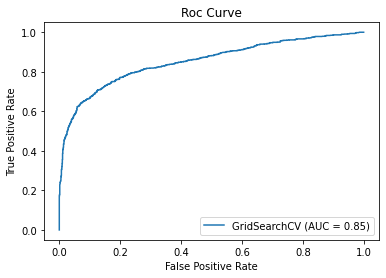

MultinomialNB(alpha=0.30000000000000004, class_prior=None, fit_prior=True)

In [ ]:
nb = get_NB()
nb = fit_models(nb, tfidf_emb, Y)
nb.best_estimator_

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10



              precision    recall  f1-score   support

           0       0.79      0.78      0.78      1263
           1       0.73      0.74      0.73      1021

    accuracy                           0.76      2284
   macro avg       0.76      0.76      0.76      2284
weighted avg       0.76      0.76      0.76      2284



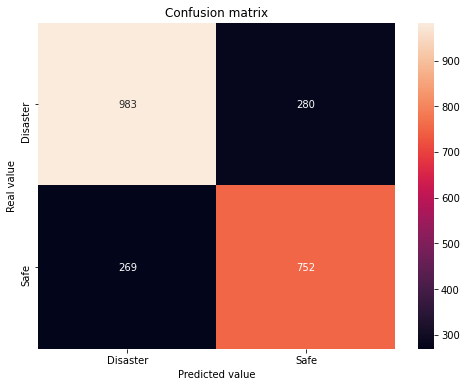

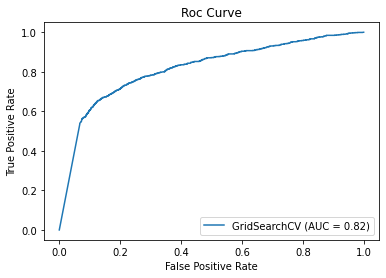

MultinomialNB(alpha=0.9, class_prior=None, fit_prior=True)

In [ ]:
nb = get_NB()
nb = fit_models(nb, ppmi_emb, Y)
nb.best_estimator_

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10



              precision    recall  f1-score   support

           0       0.79      0.80      0.80      1283
           1       0.80      0.80      0.80      1323

    accuracy                           0.80      2606
   macro avg       0.80      0.80      0.80      2606
weighted avg       0.80      0.80      0.80      2606



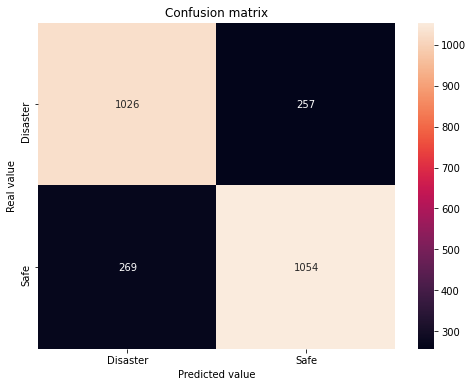

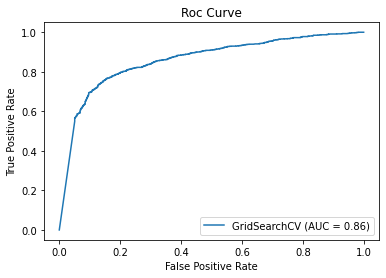

MultinomialNB(alpha=0.9, class_prior=None, fit_prior=True)

In [ ]:
nb = get_NB()
nb = fit_models(nb, ppmi_emb_smote, Y_smote_ppmi)
nb.best_estimator_


********K-FOLD SUMMARY*********
Mean Precision:  83.694, Mean Recall:  65.492, Accuracy: 79.583
              precision    recall  f1-score   support

           0       0.78      0.92      0.85      1311
           1       0.86      0.66      0.75       973

    accuracy                           0.81      2284
   macro avg       0.82      0.79      0.80      2284
weighted avg       0.81      0.81      0.80      2284



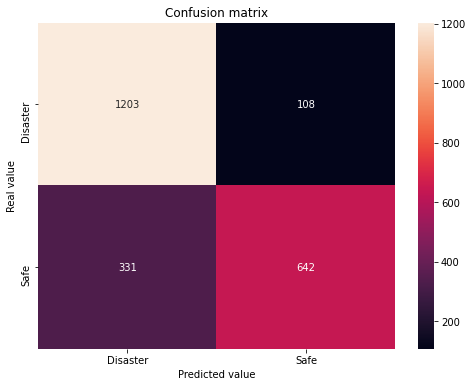

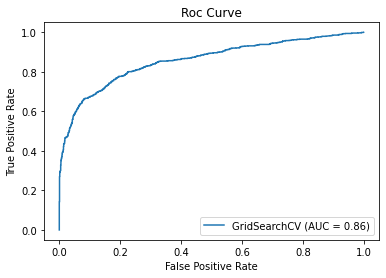

In [ ]:
nb = get_NB()
nb = fit_models(nb, tfidf_emb, Y, kflod=True)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10



              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1335
           1       0.82      0.79      0.81      1271

    accuracy                           0.81      2606
   macro avg       0.81      0.81      0.81      2606
weighted avg       0.81      0.81      0.81      2606



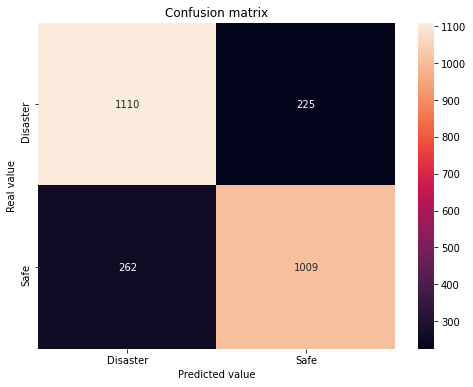

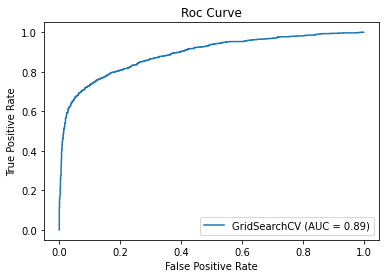

MultinomialNB(alpha=0.2, class_prior=None, fit_prior=True)

In [ ]:
nb = get_NB()
nb = fit_models(nb, tfidf_emb_smote, Y_smote_tf)
nb.best_estimator_

In [ ]:
save_pickle(nb, 'tfidf_smote_nb.pkl')


********K-FOLD SUMMARY*********
Mean Precision:  81.863, Mean Recall:  78.211, Accuracy: 80.487
              precision    recall  f1-score   support

           0       0.79      0.82      0.81      1293
           1       0.82      0.79      0.80      1313

    accuracy                           0.81      2606
   macro avg       0.81      0.81      0.81      2606
weighted avg       0.81      0.81      0.81      2606



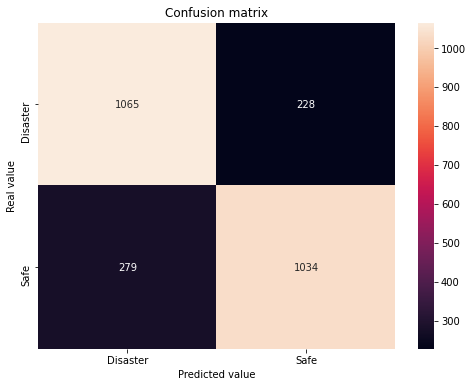

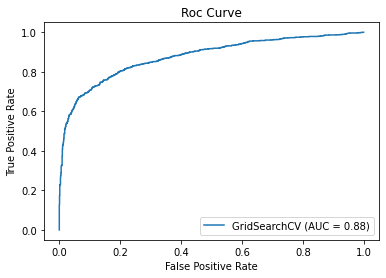

In [ ]:
nb = get_NB()
nb = fit_models(nb, tfidf_emb_smote, Y_smote, kflod=True)

#### SVM

In [ ]:
def get_SVC():
  parameters = {'C': [1e3, 5e3], 'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01]}
  return GridSearchCV(
    SVC(kernel='rbf', class_weight='balanced', probability=True), parameters
  )

              precision    recall  f1-score   support

           0       0.77      0.89      0.83      1277
           1       0.83      0.67      0.74      1007

    accuracy                           0.79      2284
   macro avg       0.80      0.78      0.79      2284
weighted avg       0.80      0.79      0.79      2284



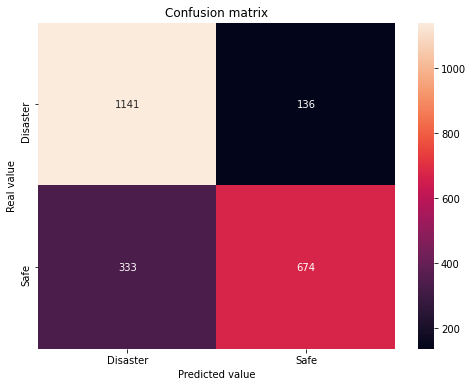

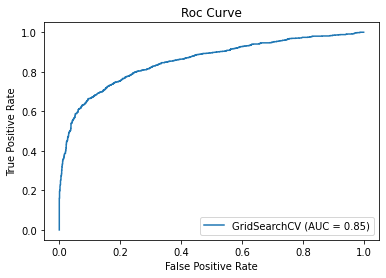

SVC(C=1000.0, break_ties=False, cache_size=200, class_weight='balanced',
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.0001,
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [ ]:
svm_tfidf = get_SVC()
svm_tfidf = fit_models(svm_tfidf, tfidf_emb, Y)
svm_tfidf.best_estimator_

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      1308
           1       0.85      0.78      0.81      1298

    accuracy                           0.82      2606
   macro avg       0.83      0.82      0.82      2606
weighted avg       0.83      0.82      0.82      2606



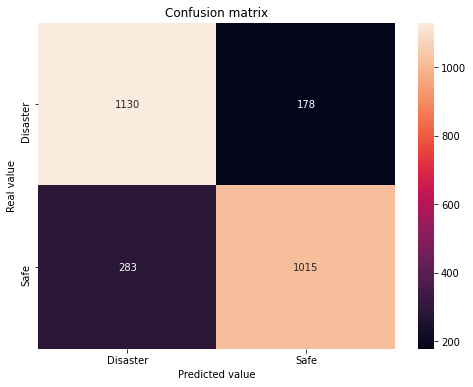

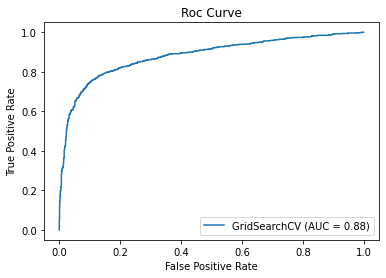

SVC(C=1000.0, break_ties=False, cache_size=200, class_weight='balanced',
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.0005,
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [ ]:
svm_tfidf_smote = get_SVC()
svm_tfidf_smote = fit_models(svm_tfidf_smote, tfidf_emb_smote, Y_smote)
svm_tfidf_smote.best_estimator_

In [ ]:
save_pickle(svm_tfidf_smote, 'tfidf_smote_svm.pkl')

              precision    recall  f1-score   support

           0       0.75      0.86      0.80      1285
           1       0.78      0.63      0.70       999

    accuracy                           0.76      2284
   macro avg       0.76      0.75      0.75      2284
weighted avg       0.76      0.76      0.76      2284



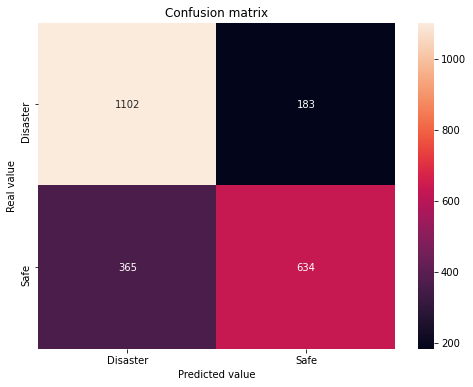

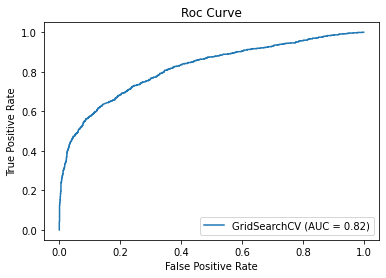

SVC(C=1000.0, break_ties=False, cache_size=200, class_weight='balanced',
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.0005,
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [ ]:
svm_tfidf_lsa = get_SVC()
svm_tfidf_lsa = fit_models(svm_tfidf_lsa, tfidf_emb_lsa_100, Y)
svm_tfidf_smote.best_estimator_

              precision    recall  f1-score   support

           0       0.63      0.49      0.55      1301
           1       0.48      0.62      0.54       983

    accuracy                           0.54      2284
   macro avg       0.55      0.55      0.54      2284
weighted avg       0.56      0.54      0.54      2284



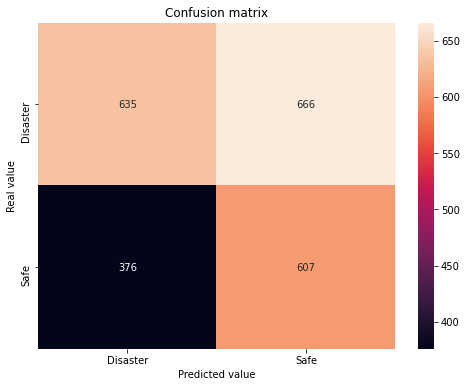

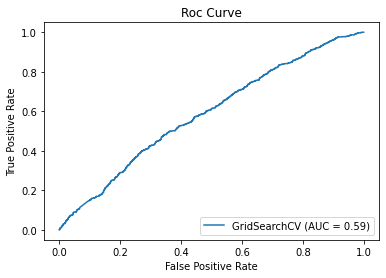

SVC(C=1000.0, break_ties=False, cache_size=200, class_weight='balanced',
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.0005,
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [ ]:
svm_tfidf_aute = get_SVC()
svm_tfidf_lsa = fit_models(svm_tfidf_aute, tfidf_emb_autenc, Y)
svm_tfidf_smote.best_estimator_

#### RF

In [ ]:
def get_rf():
  n_estimators=list(range(100,1000,300))
  param_grid = {"n_estimators":n_estimators}

  return GridSearchCV(
    estimator = RandomForestClassifier(),
    param_grid = param_grid
  )

              precision    recall  f1-score   support

           0       0.76      0.91      0.83      1318
           1       0.83      0.60      0.70       966

    accuracy                           0.78      2284
   macro avg       0.79      0.76      0.76      2284
weighted avg       0.79      0.78      0.77      2284



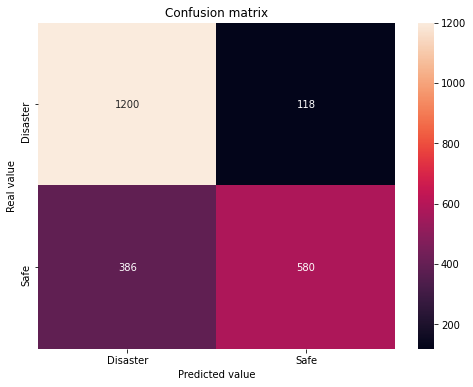

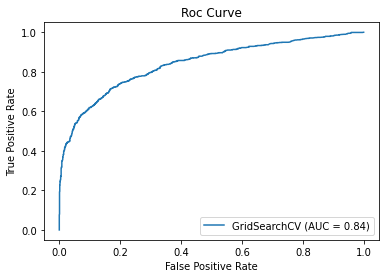

SVC(C=1000.0, break_ties=False, cache_size=200, class_weight='balanced',
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.0005,
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [ ]:
rf_tfidf = get_rf()
rf_tfidf = fit_models(rf_tfidf, tfidf_emb, Y)
svm_tfidf_smote.best_estimator_

              precision    recall  f1-score   support

           0       0.78      0.89      0.83      1327
           1       0.87      0.73      0.80      1279

    accuracy                           0.82      2606
   macro avg       0.82      0.81      0.81      2606
weighted avg       0.82      0.82      0.81      2606



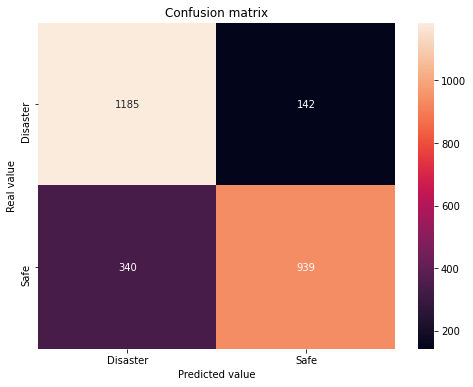

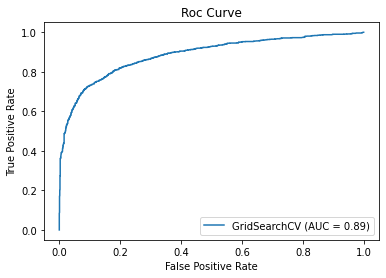

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rf_tfidf_smote = get_rf()
rf_tfidf_smote = fit_models(rf_tfidf_smote, tfidf_emb_smote, Y_smote_tf)
rf_tfidf_smote.best_estimator_

In [ ]:
save_pickle(rf_tfidf_smote, 'tfidf_smote_rf.pkl')

## Deep Learning

In [6]:
X = df_train['text_clean']
Y = df_train['target']
print(len(X), len(Y))

7613 7613


In [ ]:
def validation_split(samples, labels, validation_split = 0.2) -> tuple:

  # Extract a training & validation split
  num_validation_samples = int(validation_split * len(samples))
  train_samples = samples[:-num_validation_samples]
  val_samples = samples[-num_validation_samples:]
  train_labels = labels[:-num_validation_samples]
  val_labels = labels[-num_validation_samples:]

  print(train_samples.shape, train_labels.shape)
  print(val_samples.shape, val_labels.shape)

  return train_samples, train_labels, val_samples, val_labels

In [ ]:
# Calculating the total vocabulary
tk = Tokenizer()
tk.fit_on_texts(X)

vocab = len(tk.word_index)+1

# Maximum length
max_len = np.max(df_train['text_clean'].apply(lambda x: len(x.split())).values)

def embedding(text):
    return tk.texts_to_sequences(text)

train_padded = pad_sequences(embedding(X), max_len, padding='post')
print(train_padded.shape)
train_padded, Y = resampling(train_padded, Y)
print(train_padded.shape)

(7613, 73)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



(8684, 73)


In [ ]:
!wget http://nlp.stanford.edu/data/glove.840B.300d.zip

--2021-09-09 09:45:48--  http://nlp.stanford.edu/data/glove.840B.300d.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.840B.300d.zip [following]
--2021-09-09 09:45:48--  https://nlp.stanford.edu/data/glove.840B.300d.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.840B.300d.zip [following]
--2021-09-09 09:45:48--  http://downloads.cs.stanford.edu/nlp/data/glove.840B.300d.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2176768927 (2.0G) [application/zip

In [ ]:
!unzip -q glove.840B.300d.zip

In [ ]:
!ls

drive  glove.840B.300d.txt  glove.840B.300d.zip  sample_data


In [ ]:
def get_glove_embeddind(dimensions: int) -> dict:
  embeddings_index = {}
  with open("glove.840B.%sd.txt" %dimensions) as f:
      for line in f:
          word, coefs = line.split(maxsplit=1)
          coefs = np.fromstring(coefs, "f", sep=" ")
          embeddings_index[word] = coefs

  print("Found %s word vectors." % len(embeddings_index))
  return embeddings_index

def convert_embedding(embeddings_index: dict, embedding_dim) -> np.array:
  hits = 0
  misses = 0
  # Prepare embedding matrix
  embedding_matrix = np.zeros((vocab, embedding_dim))
  for word, i in tk.word_index.items():
      embedding_vector = embeddings_index.get(word)
      if embedding_vector is not None and embedding_vector.shape[0] != 0:
          # Words not found in embedding index will be all-zeros.
          # This includes the representation for "padding" and "OOV"
          embedding_matrix[i] = embedding_vector
          hits += 1
      else:
          misses += 1
  print("Converted %d words (%d misses)" % (hits, misses))
  return embedding_matrix


In [ ]:
embedding_dim = 300
embeddings_index = get_glove_embeddind(embedding_dim)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning:

string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.



Found 2195884 word vectors.


In [ ]:
embedding_matrix = convert_embedding(embeddings_index, embedding_dim)

Converted 9262 words (4659 misses)


In [ ]:
print(embedding_matrix.shape)

(13922, 300)


In [ ]:
# Plotting the results
def learning_curve(history, arr):
    fig, ax=plt.subplots(1, 3, figsize=(20, 5))
    for idx in range(3):
        ax[idx].plot(history.history[arr[idx][0]])
        ax[idx].plot(history.history[arr[idx][1]])
        ax[idx].legend([arr[idx][0], arr[idx][1]])
        ax[idx].set_xlabel('Epochs')
        ax[idx].set_ylabel('Value')
        ax[idx].set_title(arr[idx][0]+' X '+ arr[idx][1])

def test(model):
  yp = (model.predict(x_test)>0.5).astype('int32')
  print(metrics.classification_report(y_test, yp))
  seaborn_conf(y_test, yp)
  #metrics.plot_roc_curve(model, y_test, yp)
  #metrics.roc_curve( y_test, yp)


In [ ]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def f1_loss(y_true, y_pred):

    y_true = K.cast(y_true, 'float')
    y_pred = K.cast(y_pred, 'float')

    tp = K.sum(y_true*y_pred, axis=0)
    tn = K.sum((1-y_true)*(1-y_pred), axis=0)
    fp = K.sum((1-y_true)*y_pred, axis=0)
    fn = K.sum(y_true*(1-y_pred), axis=0)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    f1 = 2*p*r / (p+r+K.epsilon())
    f1 = tf.where(tf.math.is_nan(f1), tf.zeros_like(f1), f1)
    return 1 - K.mean(f1)

def fit(model, BATCH_SIZE, EPOCHS):
  
  # Callbacks
  checkpoint = ModelCheckpoint('model.h5', monitor = 'val_loss', verbose = 1, save_best_only = True)
  reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, verbose = 1, patience = 5, min_lr = 0.001)

  neg, pos = np.bincount(df_train['target'])
  total = neg + pos

  weight_for_0 = (1 / neg) * (total / 2.0)
  weight_for_1 = (1 / pos) * (total / 2.0)

  class_weight = {0: weight_for_0, 1: weight_for_1}


  model.compile(
      optimizer='adam', 
      loss= f1_loss, #'binary_crossentropy', 
      metrics=['accuracy', f1_m]
  )

  return model.fit(
      x_train,
      y_train, 
      batch_size=BATCH_SIZE, 
      epochs=EPOCHS,
      validation_data=(val_train, val_test),
      callbacks = [checkpoint, reduce_lr],
      class_weight=class_weight
  )


def save_model(model, filename):
  model.save('/content/drive/My Drive/datasets/nlp-getting-started/%s' % filename)

def load_model(filename):
  return keras.models.load_model(
      '/content/drive/My Drive/datasets/nlp-getting-started/%s' % filename,
      custom_objects = { 
          'f1_loss': f1_loss,  
          'f1_m': f1_m
          
      }
      
)

In [ ]:
#x_train_cnn = vectorizer(np.array([[s] for s in train_samples])).numpy()
#x_val = vectorizer(np.array([[s] for s in val_samples])).numpy()
#
#y_train_cnn = train_labels
#y_val = val_labels

print(train_padded.shape)
x_train, x_test, y_train, y_test = train_test_split(train_padded, Y, test_size=0.3)

(8684, 73)


In [ ]:
x_train, y_train, val_train, val_test = validation_split(x_train, y_train)

(4863, 73) (4863,)
(1215, 73) (1215,)


In [ ]:
print(val_train, val_test)

[[  222    66   108 ...     0     0     0]
 [  115    24   610 ...     0     0     0]
 [  371   708    14 ...     0     0     0]
 ...
 [ 7903    90   211 ...     0     0     0]
 [11094   267    49 ...     0     0     0]
 [11277 11278     7 ...     0     0     0]] [0 1 1 ... 1 0 0]


### LSTM

In [ ]:
def LSTM_net():
  BATCH_SIZE = 128
  EPOCHS = 20

  model = Sequential(name = 'LSTM')
  model.add(
      Embedding(
          input_dim=embedding_matrix.shape[0], 
          output_dim=embedding_matrix.shape[1],
          weights=[embedding_matrix],
          input_length=max_len,
          trainable=False
      )
  )
  model.add(LSTM(64, return_sequences=True))
  model.add(BatchNormalization())
  model.add(GlobalMaxPool1D())
  model.add(Dense(254, activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  model.summary()

  return model, BATCH_SIZE, EPOCHS

lstm_model = LSTM_net()

Model: "LSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 73, 300)           4176600   
_________________________________________________________________
lstm_4 (LSTM)                (None, 73, 64)            93440     
_________________________________________________________________
batch_normalization_5 (Batch (None, 73, 64)            256       
_________________________________________________________________
global_max_pooling1d_5 (Glob (None, 64)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 254)               16510     
_________________________________________________________________
dropout_12 (Dropout)         (None, 254)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 128)               32640  

In [ ]:
history = fit(*lstm_model)

Epoch 1/20
38/38 [==============================] - 5s 46ms/step - loss: 0.3639 - accuracy: 0.4987 - f1_m: 0.6376 - val_loss: 0.3697 - val_accuracy: 0.5053 - val_f1_m: 0.6709

Epoch 00001: val_loss improved from inf to 0.36967, saving model to model.h5
Epoch 2/20
38/38 [==============================] - 1s 26ms/step - loss: 0.3405 - accuracy: 0.5001 - f1_m: 0.6657 - val_loss: 0.3576 - val_accuracy: 0.5053 - val_f1_m: 0.6709

Epoch 00002: val_loss improved from 0.36967 to 0.35756, saving model to model.h5
Epoch 3/20
38/38 [==============================] - 1s 25ms/step - loss: 0.3408 - accuracy: 0.5001 - f1_m: 0.6652 - val_loss: 0.3498 - val_accuracy: 0.5053 - val_f1_m: 0.6709

Epoch 00003: val_loss improved from 0.35756 to 0.34976, saving model to model.h5
Epoch 4/20
38/38 [==============================] - 1s 25ms/step - loss: 0.3404 - accuracy: 0.5001 - f1_m: 0.6658 - val_loss: 0.3439 - val_accuracy: 0.5053 - val_f1_m: 0.6709

Epoch 00004: val_loss improved from 0.34976 to 0.34387, s

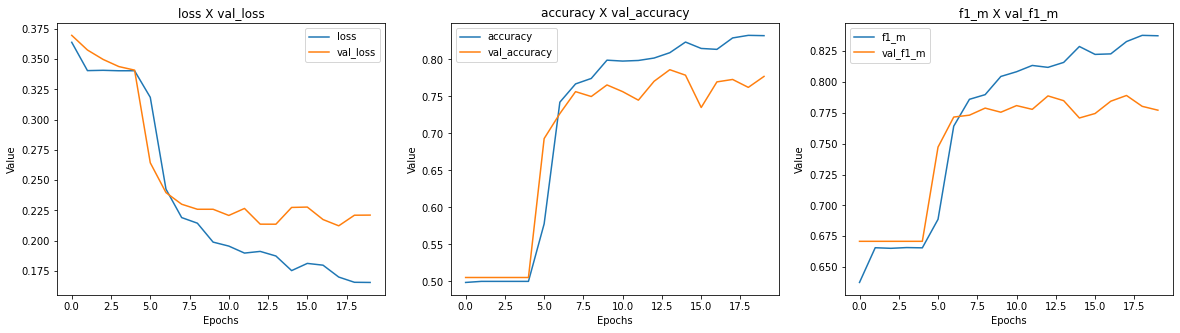

In [ ]:
learning_curve(history, [['loss', 'val_loss'], 
                         ['accuracy', 'val_accuracy'],
                         ['f1_m', 'val_f1_m']])

              precision    recall  f1-score   support

           0       0.79      0.78      0.78      1310
           1       0.78      0.79      0.78      1296

    accuracy                           0.78      2606
   macro avg       0.78      0.78      0.78      2606
weighted avg       0.78      0.78      0.78      2606



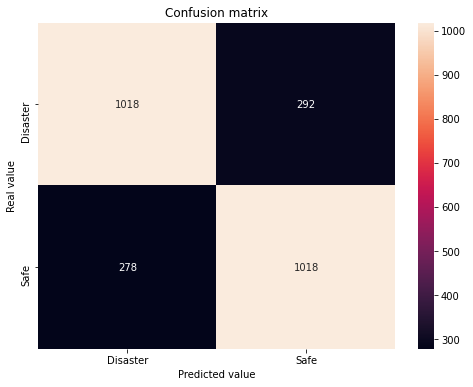

In [ ]:
test(lstm_model[0])

In [ ]:
save_model(lstm_model[0], 'lstm_model.h5')

              precision    recall  f1-score   support

           0       0.79      0.78      0.78      1310
           1       0.78      0.79      0.78      1296

    accuracy                           0.78      2606
   macro avg       0.78      0.78      0.78      2606
weighted avg       0.78      0.78      0.78      2606



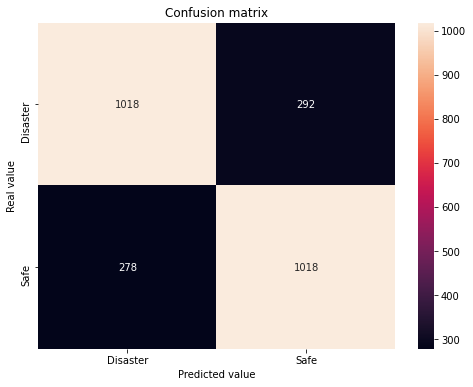

In [ ]:
m = load_model('lstm_model.h5')
test(m)

### GRU

In [ ]:
def GRU_net():
  BATCH_SIZE = 128
  EPOCHS = 20

  model = Sequential(name = 'GRU')
  model.add(
      Embedding(
          input_dim=embedding_matrix.shape[0], 
          output_dim=embedding_matrix.shape[1],
          weights=[embedding_matrix],
          input_length=max_len,
          trainable=False
      )
  )
  model.add(GRU(64, return_sequences=True))
  model.add(BatchNormalization())
  model.add(GlobalMaxPool1D())
  model.add(Dense(254, activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  model.summary()

  return model, BATCH_SIZE, EPOCHS

gru_model = GRU_net()

Model: "GRU"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 73, 300)           4176600   
_________________________________________________________________
gru_1 (GRU)                  (None, 73, 64)            70272     
_________________________________________________________________
batch_normalization_6 (Batch (None, 73, 64)            256       
_________________________________________________________________
global_max_pooling1d_6 (Glob (None, 64)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 254)               16510     
_________________________________________________________________
dropout_14 (Dropout)         (None, 254)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 128)               32640   

Epoch 1/20
38/38 [==============================] - 5s 44ms/step - loss: 0.3509 - accuracy: 0.5040 - f1_m: 0.6543 - val_loss: 0.3521 - val_accuracy: 0.5053 - val_f1_m: 0.6709

Epoch 00001: val_loss improved from inf to 0.35207, saving model to model.h5
Epoch 2/20
38/38 [==============================] - 1s 26ms/step - loss: 0.3408 - accuracy: 0.5001 - f1_m: 0.6652 - val_loss: 0.3436 - val_accuracy: 0.5053 - val_f1_m: 0.6709

Epoch 00002: val_loss improved from 0.35207 to 0.34355, saving model to model.h5
Epoch 3/20
38/38 [==============================] - 1s 27ms/step - loss: 0.3405 - accuracy: 0.5001 - f1_m: 0.6658 - val_loss: 0.3409 - val_accuracy: 0.5053 - val_f1_m: 0.6709

Epoch 00003: val_loss improved from 0.34355 to 0.34093, saving model to model.h5
Epoch 4/20
38/38 [==============================] - 1s 27ms/step - loss: 0.3406 - accuracy: 0.5001 - f1_m: 0.6656 - val_loss: 0.3560 - val_accuracy: 0.5053 - val_f1_m: 0.6709

Epoch 00004: val_loss did not improve from 0.34093
Epoch 

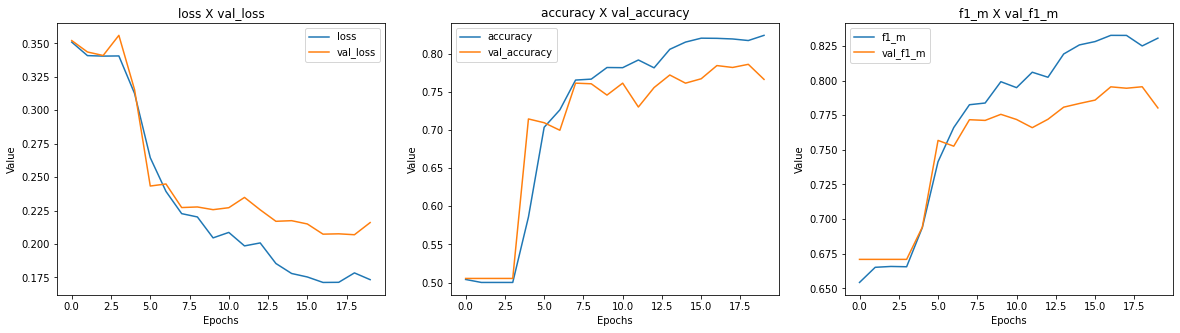

In [ ]:
history = fit(*gru_model)
learning_curve(history, [['loss', 'val_loss'], 
                         ['accuracy', 'val_accuracy'],
                         ['f1_m', 'val_f1_m']])

              precision    recall  f1-score   support

           0       0.80      0.70      0.75      1310
           1       0.73      0.83      0.78      1296

    accuracy                           0.76      2606
   macro avg       0.77      0.76      0.76      2606
weighted avg       0.77      0.76      0.76      2606



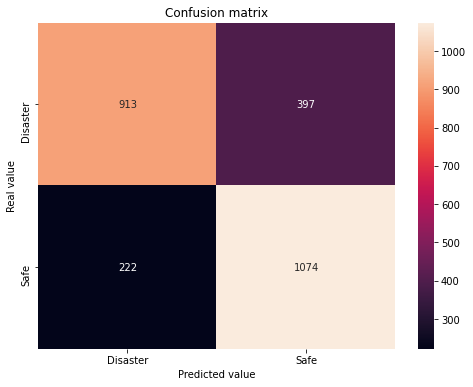

In [ ]:
test(gru_model[0])

In [ ]:
save_model(gru_model[0], 'gru_model.h5')

              precision    recall  f1-score   support

           0       0.82      0.85      0.84      1302
           1       0.80      0.76      0.77       982

    accuracy                           0.81      2284
   macro avg       0.81      0.80      0.81      2284
weighted avg       0.81      0.81      0.81      2284



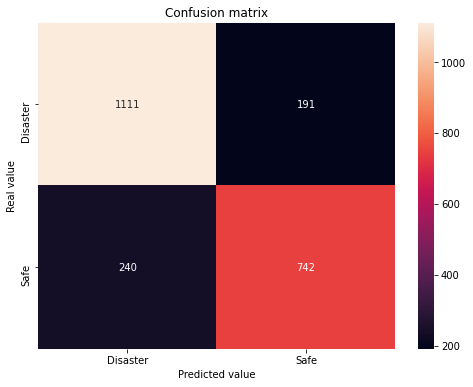

In [ ]:
m = load_model('gru_model.h5')
test(m)

### CNN + LSTM

In [ ]:
def CNN_LSTM_net():
  BATCH_SIZE = 128
  EPOCHS = 15

  model = Sequential(name = "CNN_LSTM")
  model.add(
      Embedding(
          input_dim=embedding_matrix.shape[0], 
          output_dim=embedding_matrix.shape[1],
          weights=[embedding_matrix],
          input_length=max_len,
          trainable=False
      )
  )
  model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
  model.add(MaxPooling1D())
  model.add(Dropout(0.3))
  model.add(LSTM(64, return_sequences=True))
  model.add(BatchNormalization())
  model.add(GlobalMaxPool1D())
  model.add(Dense(254, activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  model.summary()

  return model, BATCH_SIZE, EPOCHS

conv_lstm = CNN_LSTM_net()

Model: "CNN_LSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 73, 300)           4176600   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 73, 32)            28832     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 36, 32)            0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 36, 32)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 36, 64)            24832     
_________________________________________________________________
batch_normalization_7 (Batch (None, 36, 64)            256       
_________________________________________________________________
global_max_pooling1d_7 (Glob (None, 64)                0  

In [ ]:
history = fit(*conv_lstm)

Epoch 1/15
38/38 [==============================] - 5s 45ms/step - loss: 0.3596 - accuracy: 0.4997 - f1_m: 0.6428 - val_loss: 0.3716 - val_accuracy: 0.5053 - val_f1_m: 0.6709

Epoch 00001: val_loss improved from inf to 0.37158, saving model to model.h5
Epoch 2/15
38/38 [==============================] - 1s 19ms/step - loss: 0.3395 - accuracy: 0.5005 - f1_m: 0.6661 - val_loss: 0.3539 - val_accuracy: 0.5053 - val_f1_m: 0.6709

Epoch 00002: val_loss improved from 0.37158 to 0.35385, saving model to model.h5
Epoch 3/15
38/38 [==============================] - 1s 19ms/step - loss: 0.2911 - accuracy: 0.6492 - f1_m: 0.7165 - val_loss: 0.2996 - val_accuracy: 0.5811 - val_f1_m: 0.7028

Epoch 00003: val_loss improved from 0.35385 to 0.29963, saving model to model.h5
Epoch 4/15
38/38 [==============================] - 1s 19ms/step - loss: 0.2445 - accuracy: 0.7337 - f1_m: 0.7601 - val_loss: 0.2440 - val_accuracy: 0.7498 - val_f1_m: 0.7673

Epoch 00004: val_loss improved from 0.29963 to 0.24401, s

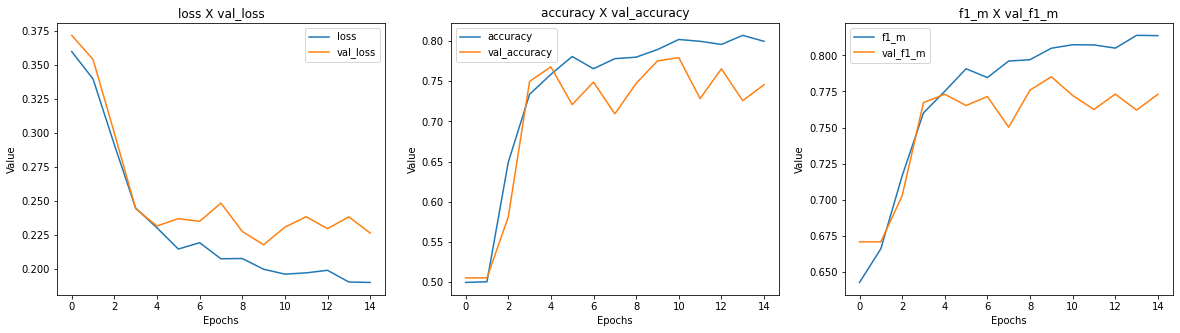

In [ ]:
learning_curve(history, [['loss', 'val_loss'],
                         ['accuracy', 'val_accuracy'],
                         ['f1_m', 'val_f1_m']])

              precision    recall  f1-score   support

           0       0.82      0.62      0.71      1310
           1       0.69      0.86      0.77      1296

    accuracy                           0.74      2606
   macro avg       0.76      0.74      0.74      2606
weighted avg       0.76      0.74      0.74      2606



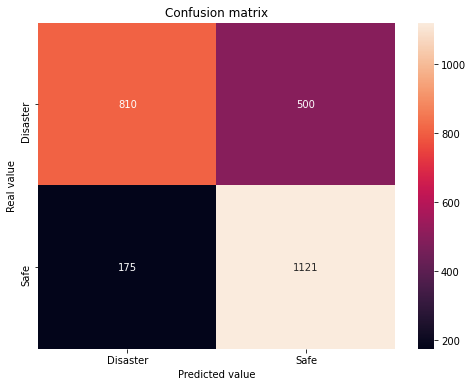

In [ ]:
test(conv_lstm[0])

In [ ]:
save_model(conv_lstm[0], 'cnn_lstm_model.h5')

              precision    recall  f1-score   support

           0       0.85      0.78      0.81      1302
           1       0.74      0.82      0.78       982

    accuracy                           0.80      2284
   macro avg       0.79      0.80      0.79      2284
weighted avg       0.80      0.80      0.80      2284



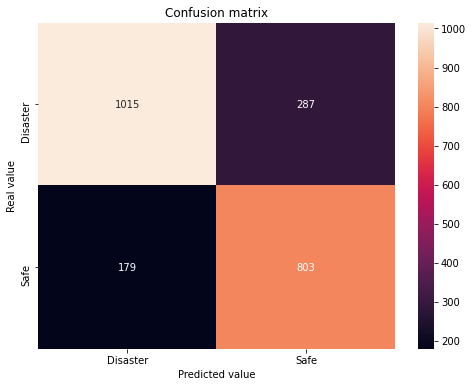

In [ ]:
conv_lstm = load_model('cnn_lstm_model.h5')
test(conv_lstm)

### BERT

In [7]:
import torch

import random
import pandas as pd
import numpy as np

import torchtext

from torchtext.legacy import data

In [8]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [9]:
!pip install transformers
!pip install emoji

     |████████████████████████████████| 2.8 MB 5.4 MB/s 
     |████████████████████████████████| 636 kB 46.7 MB/s 
     |████████████████████████████████| 3.3 MB 39.6 MB/s 
     |████████████████████████████████| 52 kB 1.6 MB/s 
     |████████████████████████████████| 895 kB 51.8 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 184 kB 5.4 MB/s 
  Created wheel for emoji: filename=emoji-1.4.2-py3-none-any.whl size=186469 sha256=6f83a5ccff557b4846fc4596670b670b83b8ae08354b818e8cd7e242f1dd9666
  Stored in directory: /root/.cache/pip/wheels/e4/61/e7/2fc1ac8f306848fc66c6c013ab511f0a39ef4b1825b11363b2
Successfully built emoji


In [12]:
from transformers import AutoModel, AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained('vinai/bertweet-base')
bert      = AutoModel.from_pretrained("vinai/bertweet-base")

Downloading:   0%|          | 0.00/558 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/843k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Downloading:   0%|          | 0.00/543M [00:00<?, ?B/s]

Some weights of the model checkpoint at vinai/bertweet-base were not used when initializing RobertaModel: ['lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.decoder.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.30)

def build_dataset(x_value, y_value, filename):
  df = pd.DataFrame({
    'quote': x_value,
    'score': y_value
  })
  print(df)
  df.to_csv(filename, index=None)

build_dataset(x_train, y_train, 'df_train.csv')
build_dataset(x_val, y_val, 'df_val.csv')
build_dataset(x_test, y_test, 'df_test.csv')

                                                  quote  score
5218  i need an arcad shooter fix but cte is empti &...      0
6885                      think i am traumatis for life      0
804   @ parksboardfact first off it is the # zippoli...      0
3617  # nyc # news legionnair death toll rise to 8 i...      1
2503  ( the abomin that maketh desol : the antichris...      0
...                                                 ...    ...
3896  would ' ve been great if mbiwa just flatten th...      0
2581  media stock are get destroy ( dis foxa cmcsa s...      0
5878  @ hienshi @ gbay99 it wouldnt turn into a sand...      0
3072  wtf thoma edison after make the lightbulb use ...      0
2070  @ gailsimon # iwasdisappointedbi telltal ' s t...      0

[3730 rows x 2 columns]
                                                  quote  score
5308  8th person die in ny legionnair ' diseas outbr...      1
3915                  a [ small ] flood with bigconsequ      1
7460  @ icymagistr her upper a

In [ ]:
!ls

df_test.csv  df_train.csv  df_val.csv  drive  sample_data


In [13]:
init_token_idx = tokenizer.cls_token_id
eos_token_idx  = tokenizer.sep_token_id
pad_token_idx  = tokenizer.pad_token_id
unk_token_idx  = tokenizer.unk_token_id

max_input_length = tokenizer.max_model_input_sizes['vinai/bertweet-base']
def tokenize_and_cut(sentence):
    tokens = tokenizer.tokenize(sentence) 
    tokens = tokens[:max_input_length-2]
    return tokens

In [14]:
quote = data.Field(
    batch_first   = True,
    use_vocab     = False, 
    tokenize      = tokenize_and_cut,
    preprocessing = tokenizer.convert_tokens_to_ids,
    init_token    = init_token_idx,
    eos_token     = eos_token_idx,
    pad_token     = pad_token_idx,
    unk_token     = unk_token_idx,
    lower         = True)

score = data.LabelField()

In [15]:
fields = {'quote': ('text', quote), 'score': ('label', score)}

train_data, valid_data, test_data = data.TabularDataset.splits(
  path        =  '.',
  train       = 'df_train.csv',
  validation  = 'df_val.csv',
  test        = 'df_test.csv',
  format      = 'csv',
  fields      = fields
)

In [16]:
print(f"Number of training examples:   {len(train_data)}")
print(f"Number of validation examples: {len(valid_data)}")
print(f"Number of testing examples:    {len(test_data)} ")
score.build_vocab(train_data)

Number of training examples:   3730
Number of validation examples: 1599
Number of testing examples:    2284 


In [17]:
BATCH_SIZE = 128
print(device)
train_iterator, valid_iterator, test_iterator = data.BucketIterator.splits(
    (train_data, valid_data, test_data), 
    batch_size = BATCH_SIZE,
    sort_key = lambda x: len(x.text),
    sort_within_batch = True,
    device = device)

cuda


In [18]:
import torch.nn as nn

class BERTGRUSentiment(nn.Module):
    def __init__(self,
                 bert,
                 hidden_dim,
                 output_dim,
                 n_layers,
                 bidirectional,
                 dropout):
        
        super().__init__()
        
        self.bert = bert
        
        embedding_dim = bert.config.to_dict()['hidden_size']

        
        self.rnn = nn.GRU(embedding_dim,
                          hidden_dim,
                          num_layers = n_layers,
                          bidirectional = bidirectional,
                          batch_first = True,
                          dropout = 0 if n_layers < 2 else dropout)
        
        self.out = nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim, output_dim)
        
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, text):
        
        #text = [batch size, sent len]
                
        with torch.no_grad():
            embedded = self.bert(text)[0]
                
        #embedded = [batch size, sent len, emb dim]
        
        _, hidden = self.rnn(embedded)
        
        #hidden = [n layers * n directions, batch size, emb dim]
        
        if self.rnn.bidirectional:
            hidden = self.dropout(torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim = 1))
        else:
            hidden = self.dropout(hidden[-1,:,:])
                
        #hidden = [batch size, hid dim]
        
        output = self.out(hidden)
        
        #output = [batch size, out dim]
        
        return output

In [19]:
HIDDEN_DIM    = 512
OUTPUT_DIM    = 1
N_LAYERS      = 6
BIDIRECTIONAL = True
DROPOUT       = 0.15

In [20]:
bert_model = BERTGRUSentiment(
    bert,
    HIDDEN_DIM,
    OUTPUT_DIM,
    N_LAYERS,
    BIDIRECTIONAL,
    DROPOUT
)

In [21]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(bert_model):,} trainable parameters')

for name, param in bert_model.named_parameters():                
    if name.startswith('bert'):
        param.requires_grad = False

print(f'The model has {count_parameters(bert_model):,} trainable parameters')

for name, param in bert_model.named_parameters():                
    if param.requires_grad:
        print(name)

The model has 162,462,977 trainable parameters
The model has 27,563,009 trainable parameters
rnn.weight_ih_l0
rnn.weight_hh_l0
rnn.bias_ih_l0
rnn.bias_hh_l0
rnn.weight_ih_l0_reverse
rnn.weight_hh_l0_reverse
rnn.bias_ih_l0_reverse
rnn.bias_hh_l0_reverse
rnn.weight_ih_l1
rnn.weight_hh_l1
rnn.bias_ih_l1
rnn.bias_hh_l1
rnn.weight_ih_l1_reverse
rnn.weight_hh_l1_reverse
rnn.bias_ih_l1_reverse
rnn.bias_hh_l1_reverse
rnn.weight_ih_l2
rnn.weight_hh_l2
rnn.bias_ih_l2
rnn.bias_hh_l2
rnn.weight_ih_l2_reverse
rnn.weight_hh_l2_reverse
rnn.bias_ih_l2_reverse
rnn.bias_hh_l2_reverse
rnn.weight_ih_l3
rnn.weight_hh_l3
rnn.bias_ih_l3
rnn.bias_hh_l3
rnn.weight_ih_l3_reverse
rnn.weight_hh_l3_reverse
rnn.bias_ih_l3_reverse
rnn.bias_hh_l3_reverse
rnn.weight_ih_l4
rnn.weight_hh_l4
rnn.bias_ih_l4
rnn.bias_hh_l4
rnn.weight_ih_l4_reverse
rnn.weight_hh_l4_reverse
rnn.bias_ih_l4_reverse
rnn.bias_hh_l4_reverse
rnn.weight_ih_l5
rnn.weight_hh_l5
rnn.bias_ih_l5
rnn.bias_hh_l5
rnn.weight_ih_l5_reverse
rnn.weight_hh_l5_r

In [26]:
def train(model, iterator, optimizer, criterion):
    
    epoch_loss = 0
    epoch_acc  = 0
    sig = nn.Sigmoid()
    
    model.train()
    
    for batch in iterator:
        
        optimizer.zero_grad()
        
        predictions = sig(model(batch.text).squeeze(1))
        
        loss = criterion(predictions, batch.label.to(torch.float32))
        
        acc = nn.functional.binary_cross_entropy(predictions, batch.label.to(torch.float32))
        
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

def fit(model, name, N_EPOCHS = 50):
  
  best_valid_loss = float('inf')
  train_list = []
  valid_list = []

  for epoch in range(N_EPOCHS):

      start_time = time.time()
      
      train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
      valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)
      
      end_time = time.time()

      epoch_mins, epoch_secs = epoch_time(start_time, end_time)
      
      if valid_loss < best_valid_loss:
          best_valid_loss = valid_loss
          torch.save(model.state_dict(), name)

      train_list.append(train_acc*100)
      valid_list.append(valid_acc*100)
      
      print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
      print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
      print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')
  
  return train_list, valid_list

def generatePlot(acc,val_acc, model_str):
   
  epochs = range(len(acc))
   
  plt.plot(epochs, acc, 'b', label='Training acc')
  plt.plot(epochs, val_acc, 'r', label='Validation acc')
  plt.title('Training and validation accuracy %s' % model_str)
  plt.legend()
   
  plt.show()

In [50]:
def evaluate(model, iterator, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    sig = nn.Sigmoid()
    
    model.eval()
    
    with torch.no_grad():
    
        for batch in iterator:

            predictions = sig(model(batch.text).squeeze(1))
            
            loss = criterion(predictions, batch.label.to(torch.float32))
        
            acc = nn.functional.binary_cross_entropy(predictions, batch.label.to(torch.float32))

            epoch_loss += loss.item()
            epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

def report(model, iterator):
    
    model.eval()
    predict = []
    Ytest   = []
    sig = nn.Sigmoid()

    with torch.no_grad():
        for batch in iterator:
          predict += torch.round(sig(model(batch.text).squeeze(1))).tolist()
          Ytest   += batch.label.tolist()
    print(metrics.classification_report(Ytest, predict))

In [23]:
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [24]:
import torch.optim as optim

optimizer  = optim.AdamW(bert_model.parameters())
criterion  = nn.BCELoss()
bert_model = bert_model.to(device)
criterion  = criterion.to(device)

In [33]:
name_model = 'BRET-model.pt'
train_list,valid_list = fit(bert_model, name_model)

Epoch: 01 | Epoch Time: 0m 26s
	Train Loss: 0.429 | Train Acc: 42.88%
	 Val. Loss: 0.471 |  Val. Acc: 47.10%
Epoch: 02 | Epoch Time: 0m 26s
	Train Loss: 0.414 | Train Acc: 41.38%
	 Val. Loss: 0.456 |  Val. Acc: 45.61%
Epoch: 03 | Epoch Time: 0m 26s
	Train Loss: 0.395 | Train Acc: 39.51%
	 Val. Loss: 0.570 |  Val. Acc: 56.98%
Epoch: 04 | Epoch Time: 0m 26s
	Train Loss: 0.420 | Train Acc: 42.00%
	 Val. Loss: 0.464 |  Val. Acc: 46.42%
Epoch: 05 | Epoch Time: 0m 26s
	Train Loss: 0.381 | Train Acc: 38.15%
	 Val. Loss: 0.464 |  Val. Acc: 46.36%
Epoch: 06 | Epoch Time: 0m 26s
	Train Loss: 0.363 | Train Acc: 36.30%
	 Val. Loss: 0.530 |  Val. Acc: 52.96%
Epoch: 07 | Epoch Time: 0m 26s
	Train Loss: 0.414 | Train Acc: 41.35%
	 Val. Loss: 0.568 |  Val. Acc: 56.78%
Epoch: 08 | Epoch Time: 0m 26s
	Train Loss: 0.374 | Train Acc: 37.44%
	 Val. Loss: 0.495 |  Val. Acc: 49.53%
Epoch: 09 | Epoch Time: 0m 26s
	Train Loss: 0.358 | Train Acc: 35.80%
	 Val. Loss: 0.491 |  Val. Acc: 49.15%
Epoch: 10 | Epoch T

In [51]:
report(bert_model, test_iterator)

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1289
           1       0.74      0.74      0.74       995

    accuracy                           0.78      2284
   macro avg       0.77      0.77      0.77      2284
weighted avg       0.78      0.78      0.78      2284



In [48]:
torch.save(bert_model.state_dict(), os.path.join(FOLDER_DATA, 'bert.model'))

## Score Fusion

In [ ]:
nb = load_pickle('tfidf_smote_nb.pkl')
rf_tfidf_smote = load_pickle('tfidf_smote_rf.pkl')
svm_tfidf_smote = load_pickle('tfidf_smote_svm.pkl')

In [ ]:
def generate_score_dataset(x_emb, x_tfidf, *models):
  df = {}

  for model in models:
    if GridSearchCV == type(model):
        yp = model.predict(x_tfidf)
        df[model.estimator] = yp
    else:
      yp = [
        value[0] for value in (model.predict(x_emb)>0.5).astype('int32')
      ]
      df[model.name] = yp

  return pd.DataFrame(df)

In [ ]:
score_dl = generate_score_dataset(
    train_padded,
    tfidf_emb_smote,
    lstm_model[0],
    nb,
    rf_tfidf_smote,
    svm_tfidf_smote
)
print(score_dl.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8684 entries, 0 to 8683
Data columns (total 4 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              Non-Null Count  Dtype
---  ------                                                                                                                                                                                                                                                                                                                    

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    score_dl, 
    Y, 
    test_size=0.3
)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       907
           1       0.95      0.93      0.94       917

    accuracy                           0.94      1824
   macro avg       0.94      0.94      0.94      1824
weighted avg       0.94      0.94      0.94      1824



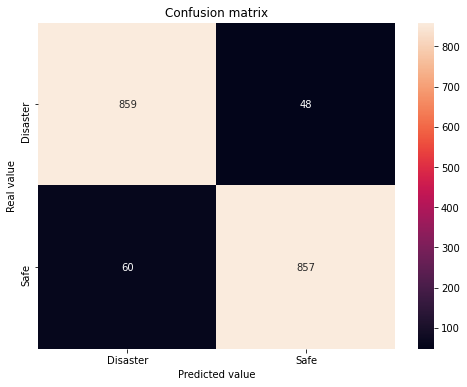

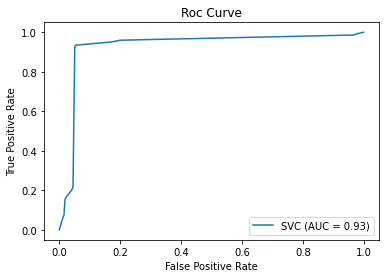

In [ ]:
svm_score = SVC()
svm_score = fit_models(svm_score, x_train, y_train)

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       879
           1       0.94      0.94      0.94       945

    accuracy                           0.94      1824
   macro avg       0.94      0.94      0.94      1824
weighted avg       0.94      0.94      0.94      1824



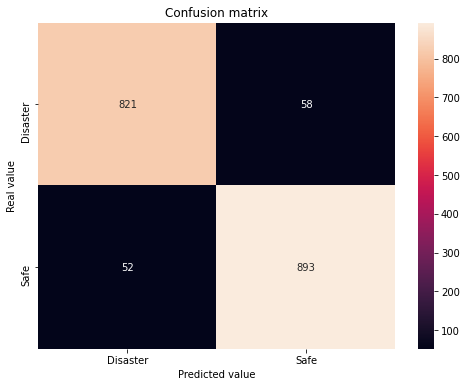

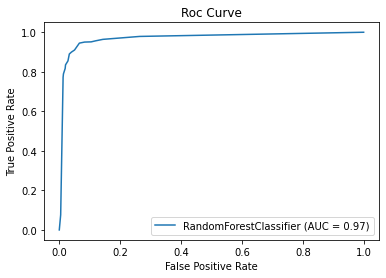

In [ ]:
rfc_score = RandomForestClassifier()
rfc_score = fit_models(rfc_score, x_train, y_train)

## Submission

In [ ]:
df_test = pd.read_csv(folder_test, index_col=False)

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          3263 non-null   int64 
 1   keyword     3237 non-null   object
 2   location    2158 non-null   object
 3   text        3263 non-null   object
 4   text_clean  3263 non-null   object
dtypes: int64(1), object(4)
memory usage: 127.6+ KB


In [ ]:
df_test['text_clean'] = df_test['text'].apply(tweet_processing_pipeline)
df_test['text_clean'].head()

NameError: ignored

In [ ]:
df_test.to_csv(folder_test, index=None)

In [ ]:
X_test = df_test['text_clean']

In [ ]:
count = CountVectorizer()
x_num = count.fit_transform(X)
tfidf = TfidfTransformer()
tfidf.fit(x_num)

x_num_test = count.transform(X_test)

x_tfidf = tfidf.transform(x_num_test)


In [ ]:
tk = Tokenizer()
tk.fit_on_texts(X_test)

vocab = len(tk.word_index)+1

# Maximum length
max_len = np.max(df_test['text'].apply(lambda x: len(x.split())).values)

def embedding(text):
    return tk.texts_to_sequences(text)

test_padded = pad_sequences(embedding(X_test), max_len, padding='post')
test_padded

array([[  38,  186,    2, ...,    0,    0,    0],
       [ 343,   55,  324, ...,    0,    0,    0],
       [  69,    8,    2, ...,    0,    0,    0],
       ...,
       [ 685,  352,  172, ...,    0,    0,    0],
       [3301,  317,  222, ...,    0,    0,    0],
       [ 199,    5,  256, ...,    0,    0,    0]], dtype=int32)

In [ ]:
print(x_tfidf.shape)
print(tfidf_emb_smote.shape)

(3263, 13844)
(8684, 13844)


In [ ]:
score_dl = generate_score_dataset(
    test_padded,
    x_tfidf,
    lstm_model[0],
    nb,
    rf_tfidf_smote,
    svm_tfidf_smote
)
print(score_dl.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              Non-Null Count  Dtype
---  ------                                                                                                                                                                                                                                                                                                                    

In [ ]:
submission = {
    "id" : df_test["id"],
    "target" : rfc_score.predict(score_dl)
}

submission_df = pd.DataFrame(submission)
submission_df.to_csv('/content/drive/My Drive/datasets/nlp-getting-started/submission_rfc.csv', index = False)

In [ ]:
submission_df.describe()

,id,target
count,3263.000000,3263.000000
mean,5427.152927,0.396261
std,3146.427221,0.489195
min,0.000000,0.000000
25%,2683.000000,0.000000
50%,5500.000000,0.000000
75%,8176.000000,1.000000
max,10875.000000,1.000000


In [ ]:
submission_df.describe()

,id,target
count,3263.000000,3263.000000
mean,5427.152927,0.336500
std,3146.427221,0.472585
min,0.000000,0.000000
25%,2683.000000,0.000000
50%,5500.000000,0.000000
75%,8176.000000,1.000000
max,10875.000000,1.000000
